In [1]:
from numpy import dot
from numpy.linalg import norm



from datasets import *
from transformers import *
from tokenizers import *
import os
import json
import torch
import numpy as np

from numpy import dot
from numpy.linalg import norm
from sklearn.cluster import KMeans
import re
from sklearn.decomposition import PCA
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import re
from sklearn.decomposition import PCA

from transformers import *





2022-04-25 18:01:12.365496: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-25 18:01:12.365514: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
model_path = "pretrained-bert"


In [3]:
#model = BertModel.from_pretrained(os.path.join(model_path, "checkpoint-50"))
model = BertModel.from_pretrained(os.path.join(model_path, "checkpoint-600"))

model.eval()


Some weights of the model checkpoint at pretrained-bert/checkpoint-600 were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at pretrained-bert/checkpoint-600 and are newly initialized: ['bert.pooler.dense.weight', 'bert.p

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [4]:
atokenizer =BertTokenizerFast.from_pretrained(model_path)

In [5]:
def get_sen_emb(sen):
    try:
        enc = atokenizer.encode(sen)
        ps = model(torch.tensor(enc).unsqueeze(1))
        sentence_embedding = torch.mean(ps[1], dim=0) #mean of all tokens embeddings will be consideres as sentence embedding
        s=sentence_embedding.cpu().detach().numpy()
        s=s.reshape(s.shape[0])
        return(s)

    except:
        print(1)
        if(atokenizer.encode(sen)>500):
               print(sen)
        
        

def plot_embd(em_np):
    plt.hist(em_np,edgecolor="yellow",bins=20)
    plt.show()
    

In [6]:
s= """तावदेव राजा सिंहरथः केवलम् अध्यापने एव पुरुषार्थं कर्तुं विचारयति स्म । सः राजप्रासादे निवसन् अपि साधुः इव जीवति स्म । अवसरं प्राप्य तेन स्वस्मै अधिकारिणे राज्यस्य दायित्वं प्रदत्तम् आसीत् । अनन्तरं विमलवाहनात् तेन दीक्षा अङ्गीकृता । दीक्षानन्तरं सः आत्मशुद्धौ एव स्वस्य सम्पूर्णं जीवनं योजितवान् । घोरतपस्यां कृत्वा तेन तीर्थङ्करगोत्रस्य बन्धनं कृतम् आसीत् । अन्ते भगवान् धर्मनाथः आराधकपदं प्राप्य स्वर्गलोकं गतवान् आसीत् ।
भगवतः धर्मनाथस्य जन्मनः एकादशदिनानाम् अवसाने राज्ञा भानुना नामकरणसंस्कारविधिः आयोजितः । तस्मिन् दिने जनैः उत्सवः अपि आचरितः आसीत् । स्वर्गलोकात् अपि बहवः देवाः समागताः । लोकान्तिकदेवैः चापि उत्सवम् आचरितम् आसीत् । उत्सवे तेषां देवानाम् उपस्थितिः आवश्यकी वर्तते । राज्यस्य नागरिकाः अपि प्रसन्नाः आसन् ।
नामकरणोत्सवे बालकस्य नामकरणं क्रियते । अतः राजा नामकरणाय देवतानां, जनानां च परामर्शं पृष्टवान् । सुव्रता बालकं नीत्वा आयोजितं स्थलं प्राप्तवती । बालकं दृष्ट्वा जनाः स्तब्धाः अभवन् । बालकस्य शरीरे महत्तेजः दृश्यते स्म । नामकरणाय सर्वैः स्वमतानि प्रदत्तानि आसन् ।
गर्भकालस्य घटनां विचार्य राज्ञा स्वस्य विचारः उक्तः यत् – “गर्भकालसमये सुव्रतायाः मनसि धार्मिकविचाराः आगताः । तस्याः मनसि धार्मिकोपासनां कर्तुम् इच्छा उद्भूता । तया प्रयत्नपूर्वकम् उपासना कृता । अतः अस्य बालकस्य नाम धर्मकुमारः इति करणीयम् । सर्वैः जनैः, देवैः च समर्थनं प्रदत्तम् । ततः आरभ्य एषः धर्मनाथः इति नाम्ना ख्यातः अस्ति ।"""

In [7]:
#s="""ॐ नमो भगवते॑ रुद्राय ॥ नम॑स्ते रुद्र म॒न्यव॑ उ॒तोत॒ इष॑वे॒ नमः॑ । नम॑स्ते अस्तु॒ धन्व॑ने बा॒हुभ्या॑मु॒त ते॒ नमः॑ । या त॒ इषुः॑ शि॒वत॑मा शि॒वं ब॒भूव॑ ते॒ धनुः॑ । शि॒वा श॑र॒व्या॑ या तव॒ तया॑ नो रुद्र मृडय । या ते॑ रुद्र शि॒वा त॒नूरघो॒रा$पा॑पकाशिनी । तया॑ नस्त॒नुवा॒ शन्त॑मया॒ गिरि॑शन्ता॒भिचा॑कशीहि । यामिषुं॑ गिरिशन्त॒ हस्ते॒ बिभ॒र्ष्यस्त॑वे । शि॒वां गि॑रित्र॒ तां कु॑रु॒ मा हिग्ं॑सीः॒ पुरु॑षं॒ जग॑त्। शि॒वेन॒ वच॑सा त्वा॒ गिरि॒शाच्छा॑वदामसि । यथा॑ नः॒ सर्व॒मिज्जग॑दय॒क्ष्मग्ं सु॒मना॒ अस॑त् । अध्य॑वोचदधिव॒क्ता प्र॑थ॒मो दैव्यो॑ भि॒षक् । अहीश्च॒ सर्वां॓ज॒म्भय॒न्त्सर्वा॓श्च यातुधा॒न्यः॑ ।अ॒सौ यस्ता॒म्रो अ॑रु॒ण उ॒त ब॒भ्रुः सु॑म॒ङ्गलः॑ । ये चे॒माग्ं रु॒द्रा अ॒भितो॑ दि॒क्षु श्रि॒ताः स॑हस्र॒शोवैषा॒ग्॒ं॒ हेड॑ ईमहे । अ॒सौ यो॑$वसर्प॑ति॒ नील॑ग्रीवो॒ विलो॑हितः । उ॒तैनं॑ गो॒पा अ॑दृश॒न्-नदृ॑शन्-नुदहा॒र्यः॑ । उ॒तैनं॒ विश्वा॑ भू॒तानि॒ स दृ॒ष्टो मृ॑डयाति नः । नमो॑ अस्तु नील॑ग्रीवाय सहस्रा॒क्षाय॒ मी॒ढुषे॓ । अथो॒ ये अ॑स्य॒ सत्वा॑नो॒$हं तेभ्यो॑$कर॒न्नमः॑ । प्रमुं॑च॒ धन्व॑न॒स्-त्व॒मु॒भयो॒रार्त्नि॑ यो॒र्ज्याम् । याश्च ते॒ हस्त॒ इष॑वः॒ परा॒ ता भ॑गवो वप । अ॒व॒तत्य॒ धनु॒स्त्वग्ं सह॑स्राक्ष॒ शते॑षुधे । नि॒शीर्य॑ श॒ल्यानां॒ मुखा॑ शि॒वो नः॑ सु॒मना॑ भव । विज्यं॒ धनुः॑ कप॒र्दिनो॒ विश॑ल्यो॒ बाण॑वाग्म् उ॒त । अने॑श॒न्-नस्येष॑व आ॒भुर॑स्य निष॒ङ्गथिः॑ ।या ते॑ हे॒तिर्-मी॑डुष्टम॒ हस्ते॑ ब॒भूव॑ ते॒ धनुः॑ । तया॒$स्मान्, वि॒श्वत॒स्-त्वम॑य॒क्ष्मया॒ परि॑ब्भुज । नम॑स्ते अ॒स्त्वायुधा॒याना॑तताय धृ॒ष्णवे॓ । उ॒भाभ्या॑मु॒त ते॒ नमो॑ बा॒हुभ्यां॒ तव॒ धन्व॑ने । परि॑ ते॒ धन्व॑नो हे॒तिर॒स्मान्-वृ॑णक्तु वि॒श्वतः॑ । अथो॒ य इ॑षु॒धिस्तवा॒रे अ॒स्मन्निधे॑हि॒ तम् ॥ 1 ॥नम॑स्ते अस्तु भगवन्-विश्वेश्व॒राय॑ महादे॒वाय॑ त्र्यम्ब॒काय॑ त्रिपुरान्त॒काय॑ त्रिकाग्निका॒लाय॑ कालाग्निरु॒द्राय॑ नील॒कण्ठाय॑ मृत्युञ्ज॒याय॑ सर्वेश्व॑राय॑ सदाशि॒वाय॑ श्रीमन्-महादे॒वाय॒ नमः॑ ॥नमो॒ हिर॑ण्य बाहवे सेना॒न्ये॑ दि॒शां च॒ पत॑ये॒ नमो॒ नमो॑ वृ॒क्षेभ्यो॒ हरि॑केशेभ्यः पशू॒नां पत॑ये॒ नमो॒ नमः॑ स॒स्पिञ्ज॑राय॒ त्विषी॑मते पथी॒नां पत॑ये॒ नमो॒ नमो॑ बभ्लु॒शाय॑ विव्या॒धिने$न्ना॑नां॒ पत॑ये॒ नमो॒ नमो॒ हरि॑केशायोपवी॒तिने॑ पु॒ष्टानां॒ पत॑ये॒ नमो॒ नमो॑ भ॒वस्य॑ हे॒त्यै जग॑तां॒ पत॑ये॒ नमो॒ नमो॑ रु॒द्राया॑तता॒विने॒ क्षेत्रा॑णां॒ पत॑ये॒ नमो॒ नमः॑ सू॒तायाहं॑त्याय॒ वना॑नां॒ पत॑ये॒ नमो॒ नमो॒ रोहि॑ताय स्थ॒पत॑ये वृ॒क्षाणां॒ पत॑ये॒ नमो॒ नमो॑ म॒न्त्रिणे॑ वाणि॒जाय॒ कक्षा॑णां॒ पत॑ये॒ नमो॒ नमो॑ भुव॒न्तये॑ वारिवस्कृ॒ता-यौष॑धीनां॒ पत॑ये॒ नमो॒ नम॑ उ॒च्चैर्-घो॑षायाक्र॒न्दय॑ते पत्ती॒नां पत॑ये॒ नमो॒ नमः॑ कृत्स्नवी॒ताय॒ धाव॑ते॒ सत्त्व॑नां॒ पत॑ये॒ नमः॑ नमः॒ सह॑मानाय निव्या॒धिन॑ आव्या॒धिनी॑नां॒ पत॑ये नमो॒ नमः॑ ककु॒भाय॑ निष॒ङ्गिणे॓ स्ते॒नानां॒ पत॑ये॒ नमो॒ नमो॑ निष॒ङ्गिण॑ इषुधि॒मते॑ तस्क॑राणां॒ पत॑ये॒ नमो॒ नमो॒ वञ्च॑ते परि॒वञ्च॑ते स्तायू॒नां पत॑ये॒ नमो॒ नमो॑ निचे॒रवे॑ परिच॒रायार॑ण्यानां॒ पत॑ये॒ नमो॒ नमः॑ सृका॒विभ्यो॒ जिघाग्ं॑सद्भ्यो मुष्ण॒तां पत॑ये॒ नमो॒ नमो॑$सि॒मद्भ्यो॒ नक्त॒ञ्चर॑द्भ्यः प्रकृ॒न्तानां॒ पत॑ये॒ नमो॒ नम॑ उष्णी॒षिने॑ गिरिच॒राय॑ कुलु॒ञ्चानां॒ पत॑ये॒ नमो॒ नम॒ इषु॑मद्भ्यो धन्वा॒विभ्य॑श्च वो॒ नमो॒ नम॑ आतन्-वा॒नेभ्यः॑ प्रति॒दधा॑नेभ्यश्च वो॒ नमो॒ नम॑ आ॒यच्छ॒॑द्भ्यो विसृ॒जद्-भ्य॑श्च वो॒ नमो॒ नमो$स्स॑द्भ्यो॒ विद्य॑द्-भ्यश्च वो॒ नमो॒ नम॒ आसी॑नेभ्यः॒ शया॑नेभ्यश्च वो॒ नमो॒ नमः॑ स्व॒पद्भ्यो॒ जाग्र॑द्-भ्यश्च वो॒ नमो॒ नम॒स्तिष्ठ॑द्भ्यो॒ धाव॑द्-भ्यश्च वो॒ नमो॒ नमः॑ स॒भाभ्यः॑ स॒भाप॑तिभ्यश्च वो॒ नमो॒ नमो॒ अश्वे॒भ्यो$श्व॑पतिभ्यश्च वो॒ नमः॑नम॑ आव्या॒धिनी॓भ्यो वि॒विध्य॑न्तीभ्यश्च वो॒ नमो॒ नम॒ उग॑णाभ्यस्तृगं-ह॒तीभ्यश्च॑ वो॒ नमो॒ नमो॑ गृ॒त्सेभ्यो॑ गृ॒त्सप॑तिभ्यश्च वो॒ नमो॒ नमो॒ व्राते॓भ्यो॒ व्रात॑पतिभ्यश्च वो॒ नमो॒ नमो॑ ग॒णेभ्यो॑ ग॒णप॑तिभ्यश्च वो॒ नमो॒ नमो॒ विरू॑पेभ्यो वि॒श्वरू॑पेभ्यश्च वो॒ नमो॒ नमो॑ मह॒द्भ्यः॑, क्षुल्ल॒केभ्य॑श्च वो॒ नमो॒ नमो॑ र॒थिभ्यो॒$र॒थेभ्य॑श्च वो॒ नमो॒ नमो॒ रथे॓भ्यो॒ रथ॑पतिभ्यश्च वो॒ नमो॒ नमः॑ सेना॓भ्यः सेना॒निभ्य॑श्च वो॒ नमो॒ नमः॑, क्ष॒त्तृभ्यः॑ सङ्ग्रही॒तृभ्य॑श्च वो॒ नमो॒ नम॒स्तक्ष॑भ्यो रथका॒रेभ्य॑श्च वो॒ नमो॑ नमः॒ कुला॑लेभ्यः क॒र्मारे॓भ्यश्च वो॒ नमो॒ नमः॑ पु॒ञ्जिष्टे॓भ्यो निषा॒देभ्य॑श्च वो॒ नमो॒ नमः॑ इषु॒कृद्भ्यो॑ धन्व॒कृद्-भ्य॑श्च वो॒ नमो॒ नमो॑ मृग॒युभ्यः॑ श्व॒निभ्य॑श्च वो॒ नमो॒ नमः॒ श्वभ्यः॒ श्वप॑तिभ्यश्च वो॒ नमः॑ ॥ नमो॑ भ॒वाय॑ च रु॒द्राय॑ च॒ नमः॑ श॒र्वाय॑ च पशु॒पत॑ये च॒ नमो॒ नील॑ग्रीवाय च शिति॒कण्ठा॑य च॒ नमः॑ कप॒र्दिने॑ च॒ व्यु॑प्तकेशाय च॒ नमः॑ सहस्रा॒क्षाय॑ च श॒तध॑न्वने च॒ नमो॑ गिरि॒शाय॑ च शिपिवि॒ष्टाय॑ च॒ नमो॑ मी॒ढुष्ट॑माय॒ चेषु॑मते च॒ नमो᳚ ह्र॒स्वाय॑ च वाम॒नाय॑ च॒ नमो॑ बृह॒ते च॒ वर्षी॑यसे च॒ नमो॑ वृ॒द्धाय॑ च सं॒वृद्व॑ने च॒ नमो॒ अग्रि॑याय च प्रथ॒माय॑ च॒ नम॑ आ॒शवे॑ चाजि॒राय॑ च॒ नमः॒ शीघ्रि॑याय च॒ शीभ्या॑य च॒ नम॑ ऊ॒र्म्या॑य चावस्व॒न्या॑य च॒ नमः॑ स्रोत॒स्या॑य च॒ द्वीप्या॑य च ॥ नम ज्ये॒ष्ठाय॑ च कनि॒ष्ठाय॑ च॒ नमः॑ पूर्व॒जाय॑ चापर॒जाय॑ च॒ नमो॑ मध्य॒माय॑ चापग॒ल्भाय॑ च॒ नमो॑ जघ॒न्या॑य च॒ बुध्नि॑याय च॒ नमः॑ सो॒भ्या॑य च प्रतिस॒र्या॑य च॒ नमो॒ याम्या॑य च॒ क्षेम्या॑य च॒ नम॑ उर्व॒र्या॑य च॒ खल्या॑य च॒ नमः॒ श्लोक्या॑य चाऽवसा॒न्या॑य च॒ नमो॒ वन्या॑य च॒ कक्ष्या॑य च॒ नमः॑ श्र॒वाय॑ च प्रतिश्र॒वाय॑ च॒ नम॑ आ॒शुषे॑णाय चा॒शुर॑थाय च॒ नमः॒ शूरा॑य चावभिन्द॒ते च॒ नमो॑ व॒र्मिणे॑ च वरू॒थिने॑ च॒ नमो॑ बि॒ल्मिने॑ च कव॒चिने॑ च॒ नमः॑ श्रु॒ताय॑ च श्रुतसे॒नाय॑ च ॥नमो॑ दुन्दु॒भ्या॑य चाहन॒न्या॑य च॒ नमो॑ धृ॒ष्णवे॑ च प्रमृ॒शाय॑ च॒ नमो॑ दू॒ताय॑ च॒ प्रहि॑ताय च॒ नमो॑ निष॒ङ्गिणे॑ चेषुधि॒मते॑ च॒ नम॑स्ती॒क्ष्णेष॑वे चायु॒धिने॑ च॒ नमः॑ स्वायु॒धाय॑ च सु॒धन्व॑ने च॒ नमः॒ स्रुत्या॑य च॒ पथ्या॑य च॒ नमः॑ का॒ट्या॑य च नी॒प्या॑य च॒ नमः॒ सूद्या॑य च सर॒स्या॑य च॒ नमो॑ ना॒द्याय॑ च वैश॒न्ताय॑ च॒ नमः॒ कूप्या॑य चाव॒ट्या॑य च॒ नमो॒ वर्ष्या॑य चाव॒र्ष्याय॑ च॒ नमो॑ मे॒घ्या॑य च विद्यु॒त्या॑य च॒ नम॑ ई॒ध्रिया॑य चात॒प्या॑य च॒ नमो॒ वात्या॑य च॒ रेष्मि॑याय च॒ नमो॑ वास्त॒व्या॑य च वास्तु॒पाय॑ च ॥नमः॒ सोमा॑य च रु॒द्राय॑ च॒ नम॑स्ता॒म्राय॑ चारु॒णाय॑ च॒ नमः॑ श॒ङ्गाय॑ च पशु॒पत॑ये च॒ नम॑ उ॒ग्राय॑ च भी॒माय॑ च॒ नमो॑ अग्रेव॒धाय॑ च दूरेव॒धाय॑ च॒ नमो॑ ह॒न्त्रे च॒ हनी॑यसे च॒ नमो॑ वृ॒क्षेभ्यो॒ हरि॑केशेभ्यो॒ नम॑स्ता॒राय॒ नम॑श्शं॒भवे॑ च मयो॒भवे॑ च॒ नमः॑ शंक॒राय॑ च मयस्क॒राय॑ च॒ नमः॑ शि॒वाय॑ च शि॒वत॑राय च॒ नम॒स्तीर्थ्या॑य च॒ कूल्या॑य च॒ नमः॑ पा॒र्या॑य चावा॒र्या॑य च॒ नमः॑ प्र॒तर॑णाय चो॒त्तर॑णाय च॒ नम॑ आता॒र्या॑य चाला॒द्या॑य च॒ नमः॒ शष्प्या॑य च॒ फेन्या॑य च॒ नमः॑ सिक॒त्या॑य च प्रवा॒ह्या॑य च ॥ नम॑ इरि॒ण्या॑य च प्रप॒थ्या॑य च॒ नमः॑ किꣳशि॒लाय च॒ क्षय॑णाय च॒ नमः॑ कप॒र्दिने॑ च पुल॒स्तये॑ च॒ नमो॒ गोष्ठ्या॑य च॒ गृह्या॑य च॒ नम॒स्तल्प्या॑य च॒ गेह्या॑य च॒ नमः॑ का॒ट्या॑य च गह्वरे॒ष्ठाय॑ च॒ नमो᳚ ह्रद॒य्या॑य च निवे॒ष्प्या॑य च॒ नमः॑ पाꣳस॒व्या॑य च रज॒स्या॑य च॒ नमः॒ शुष्क्या॑य च हरि॒त्या॑य च॒ नमो॒ लोप्या॑य चोल॒प्या॑य च॒ नम॑ ऊ॒र्व्या॑य च सू॒र्म्या॑य च॒ नमः॑ प॒र्ण्या॑य च पर्णश॒द्या॑य च॒ नमो॑ऽपगु॒रमा॑णाय चाभिघ्न॒ते च॒ नम॑ आख्खिद॒ते च॑ प्रख्खिद॒ते च॒ नमो॑ वः किरि॒केभ्यो॑ दे॒वाना॒ꣳ॒ हृद॑येभ्यो॒ नमो॑ विक्षीण॒केभ्यो॒ नमो॑ विचिन्व॒त्केभ्यो॒ नम॑ आनिर्ह॒तेभ्यो॒ नम॑ आमीव॒त्केभ्यः॑ ॥द्रापे॒ अन्ध॑सस्पते॒ दरि॑द्र॒न्नील॑लोहित । ए॒षां पुरु॑षाणामे॒षां प॑शू॒नां मा भेर्माऽरो॒ मो ए॑षां॒ किंच॒नाम॑मत् । या ते॑ रुद्र शि॒वा त॒नूः शि॒वा वि॒श्वाह॑ भेषजी । शि॒वा रु॒द्रस्य॑ भेष॒जी तया॑ नो मृड जी॒वसे᳚ । इ॒माꣳ रु॒द्राय॑ त॒वसे॑ कप॒र्दिने᳚ क्ष॒यद्वी॑राय॒ प्रभ॑रामहे म॒तिम् ॥ यथा॑ नः॒ शमस॑द्द्वि॒पदे॒ चतु॑ष्पदे॒ विश्वं॑ पु॒ष्टं ग्रामे॑ अ॒स्मिन्नना॑तुरम् । मृ॒डा नो॑ रुद्रो॒त नो॒ मय॑स्कृधि क्ष॒यद्वी॑राय॒ नम॑सा विधेम ते । यच्छं च॒ योश्च॒ मनु॑राय॒जे पि॒ता तद॑श्याम॒ तव॑ रुद्र॒ प्रणी॑तौ । मा नो॑ म॒हान्त॑मु॒त मा नो॑ अर्भ॒कं मा न॒ उक्ष॑न्त-मु॒त मा न॑ उक्षि॒तम् । मा नो॑ऽवधीः पि॒तरं॒ मोत मा॒तरं॑ प्रि॒या मा न॑स्त॒नुवो॑ रुद्र रीरिषः । मान॑स्तो॒के तन॑ये॒ मा न॒ आयु॑षि॒ मा नो॒ गोषु॒ मा नो॒ अश्वे॑षु रीरिषः । वी॒रान्मा नो॑ रुद्र भामि॒तोऽव॑धी-र्ह॒विष्म॑न्तो॒ नम॑सा विधेम ते ॥आ॒रात्ते॑ गो॒घ्न उ॒त पू॑रुष॒घ्ने क्ष॒यद्वी॑राय सु॒म्नम॒स्मे ते॑ अस्तु । रक्षा॑ च नो॒ अधि॑ च देव ब्रू॒ह्यधा॑ च नः॒ शर्म॑ यच्छ द्वि॒बर्हाः᳚ ॥ स्तु॒हि श्रु॒तं ग॑र्त॒सदं॒ युवा॑नं मृ॒गन्न भी॒म-मु॑पह॒त्नुमु॒ग्रम् । मृ॒डा ज॑रि॒त्रे रु॑द्र॒ स्तवा॑नो अ॒न्यन्ते॑ अ॒स्मन्निव॑पन्तु॒ सेनाः᳚ ॥ परि॑णो रु॒द्रस्य॑ हे॒तिर्वृ॑णक्तु॒ परि॑ त्वे॒षस्य॑ दुर्म॒तिर॑घा॒योः । अव॑ स्थि॒रा म॒घव॑द्भ्यस्तनुष्व॒ मीढ्व॑स्तो॒काय॒ तन॑याय मृउडय ॥ मीढु॑ष्टम॒ शिव॑तम शि॒वो नः॑ सु॒मना॑ भव । प॒र॒मे वृ॒क्ष आयु॑धन्नि॒धाय॒ कृत्तिं॒ वसा॑न॒ आच॑र॒ पिना॑कं॒ बिभ्र॒दाग॑हि ॥ विकि॑रिद॒ विलो॑हित॒ नम॑स्ते अस्तु भगवः । यास्ते॑ स॒हस्रꣳ॑ हे॒तयो॒न्यम॒स्मन्निव॑पन्तु॒ ताः ॥ स॒हस्रा॑णि सहस्र॒धा बा॑हु॒वोस्तव॑ हे॒तयः॑ । तासा॒मीशा॑नो भगवः परा॒चीना॒ मुखा॑ कृधि ॥स॒हस्रा॑णि सहस्र॒शो ये रु॒द्रा अधि॒ भूम्या᳚म् । तेषाꣳ॑ सहस्रयोज॒नेऽव॒धन्वा॑नि तन्मसि ॥ अ॒स्मिन् म॑ह॒त्य॑र्ण॒वे᳚ऽन्तरि॑क्षे भ॒वा अधि॑ ॥ नील॑ग्रीवाः शिति॒कण्ठाः᳚ श॒र्वा अ॒धः क्ष॑माच॒राः ॥ नील॑ग्रीवाः शिति॒कण्ठा॒ दिवꣳ॑ रु॒द्रा उप॑श्रिताः ॥ ये वृ॒क्षेषु॑ स॒स्पिंज॑रा॒ नील॑ग्रीवा॒ विलो॑हिताः ॥ ये भू॒ताना॒मधि॑पतयो विशि॒खासः॑ कप॒र्दिनः॑ ॥ ये अन्ने॑षु वि॒विध्य॑न्ति॒ पात्रे॑षु॒ पिब॑तो॒ जनान्॑ ॥ ये प॒थां प॑थि॒रक्ष॑य ऐलबृ॒दा य॒व्युधः॑ ॥ ये ती॒र्थानि॑ प्र॒चर॑न्ति सृ॒काव॑न्तो निष॒ङ्गिणः॑ ॥ य ए॒ताव॑न्तश्च॒ भूयाꣳ॑सश्च॒ दिशो॑ रु॒द्रा वि॑तस्थि॒रे । तेषाꣳ॑ सहस्र-योज॒नेऽव॒धन्वा॑नि तन्मसि ॥ नमो॑ रु॒द्रेभ्यो॒ ये पृ॑थि॒व्यां ऽन्तरि॑क्षे॒ ये दि॒वि येषा॒मन्नं॒ वातो॑ व॒र्षमिष॑व॒स्तेभ्यो॒ दश॒ प्राची॒र्दश॑ दक्षि॒णा दश॑ प्र॒तीची॒र्दशोदी॑चीर्दशो॒र्ध्वास्तेभ्यो॒ नम॒स्ते नो॑ मृडयन्तु॒ ते यं द्वि॒ष्मो यश्च॑ नो॒ द्वेष्टि॒ तं वो॒ जम्भे॑ दधामि ॥"""
s="""'ॐ नमो भगवते॑ रुद्राय ॥ नम॑स्ते रुद्र म॒न्यव॑ उ॒तोत॒ इष॑वे॒ नमः॑ । नम॑स्ते अस्तु॒ धन्व॑ने बा॒हुभ्या॑मु॒त ते॒ नमः॑ । या त॒ इषुः॑ शि॒वत॑मा शि॒वं ब॒भूव॑ ते॒ धनुः॑ । शि॒वा श॑र॒व्या॑ या तव॒ तया॑ नो रुद्र मृडय । या ते॑ रुद्र शि॒वा त॒नूरघो॒रा$पा॑पकाशिनी । तया॑ नस्त॒नुवा॒ शन्त॑मया॒ गिरि॑शन्ता॒भिचा॑कशीहि । यामिषुं॑ गिरिशन्त॒ हस्ते॒ बिभ॒र्ष्यस्त॑वे । शि॒वां गि॑रित्र॒ तां कु॑रु॒ मा हिग्ं॑सीः॒ पुरु॑षं॒ जग॑त्। शि॒वेन॒ वच॑सा त्वा॒ गिरि॒शाच्छा॑वदामसि । यथा॑ नः॒ सर्व॒मिज्जग॑दय॒क्ष्मग्ं सु॒मना॒ अस॑त् । अध्य॑वोचदधिव॒क्ता प्र॑थ॒मो दैव्यो॑ भि॒षक् । अहीश्च॒ सर्वां॓ज॒म्भय॒न्त्सर्वा॓श्च यातुधा॒न्यः॑ ।अ॒सौ यस्ता॒म्रो अ॑रु॒ण उ॒त ब॒भ्रुः सु॑म॒ङ्गलः॑ । ये चे॒माग्ं रु॒द्रा अ॒भितो॑ दि॒क्षु श्रि॒ताः स॑हस्र॒शोवैषा॒ग्॒ं॒ हेड॑ ईमहे । अ॒सौ यो॑$वसर्प॑ति॒ नील॑ग्रीवो॒ विलो॑हितः । उ॒तैनं॑ गो॒पा अ॑दृश॒न्-नदृ॑शन्-नुदहा॒र्यः॑ । उ॒तैनं॒ विश्वा॑ भू॒तानि॒ स दृ॒ष्टो मृ॑डयाति नः । नमो॑ अस्तु नील॑ग्रीवाय सहस्रा॒क्षाय॒ मी॒ढुषे॓ । अथो॒ ये अ॑स्य॒ सत्वा॑नो॒$हं तेभ्यो॑$कर॒न्नमः॑ । प्रमुं॑च॒ धन्व॑न॒स्-त्व॒मु॒भयो॒रार्त्नि॑ यो॒र्ज्याम् । याश्च ते॒ हस्त॒ इष॑वः॒ परा॒ ता भ॑गवो वप । अ॒व॒तत्य॒ धनु॒स्त्वग्ं सह॑स्राक्ष॒ शते॑षुधे । नि॒शीर्य॑ श॒ल्यानां॒ मुखा॑ शि॒वो नः॑ सु॒मना॑ भव । विज्यं॒ धनुः॑ कप॒र्दिनो॒ विश॑ल्यो॒ बाण॑वाग्म् उ॒त । अने॑श॒न्-नस्येष॑व आ॒भुर॑स्य निष॒ङ्गथिः॑ ।या ते॑ हे॒तिर्-मी॑डुष्टम॒ हस्ते॑ ब॒भूव॑ ते॒ धनुः॑ । तया॒$स्मान्, वि॒श्वत॒स्-त्वम॑य॒क्ष्मया॒ परि॑ब्भुज । नम॑स्ते अ॒स्त्वायुधा॒याना॑तताय धृ॒ष्णवे॓ । उ॒भाभ्या॑मु॒त ते॒ नमो॑ बा॒हुभ्यां॒ तव॒ धन्व॑ने । परि॑ ते॒ धन्व॑नो हे॒तिर॒स्मान्-वृ॑णक्तु वि॒श्वतः॑ । अथो॒ य इ॑षु॒धिस्तवा॒रे अ॒स्मन्निधे॑हि॒ तम् ॥ 1 ॥नम॑स्ते अस्तु भगवन्-विश्वेश्व॒राय॑ महादे॒वाय॑ त्र्यम्ब॒काय॑ त्रिपुरान्त॒काय॑ त्रिकाग्निका॒लाय॑ कालाग्निरु॒द्राय॑ नील॒कण्ठाय॑ मृत्युञ्ज॒याय॑ सर्वेश्व॑राय॑ सदाशि॒वाय॑ श्रीमन्-महादे॒वाय॒ नमः॑ ॥नमो॒ हिर॑ण्य बाहवे सेना॒न्ये॑ दि॒शां च॒ पत॑ये॒ नमो॒ नमो॑ वृ॒क्षेभ्यो॒ हरि॑केशेभ्यः पशू॒नां पत॑ये॒ नमो॒ नमः॑ स॒स्पिञ्ज॑राय॒ त्विषी॑मते पथी॒नां पत॑ये॒ नमो॒ नमो॑ बभ्लु॒शाय॑ विव्या॒धिने$न्ना॑नां॒ पत॑ये॒ नमो॒ नमो॒ हरि॑केशायोपवी॒तिने॑ पु॒ष्टानां॒ पत॑ये॒ नमो॒ नमो॑ भ॒वस्य॑ हे॒त्यै जग॑तां॒ पत॑ये॒ नमो॒ नमो॑ रु॒द्राया॑तता॒विने॒ क्षेत्रा॑णां॒ पत॑ये॒ नमो॒ नमः॑ सू॒तायाहं॑त्याय॒ वना॑नां॒ पत॑ये॒ नमो॒ नमो॒ रोहि॑ताय स्थ॒पत॑ये वृ॒क्षाणां॒ पत॑ये॒ नमो॒ नमो॑ म॒न्त्रिणे॑ वाणि॒जाय॒ कक्षा॑णां॒ पत॑ये॒ नमो॒ नमो॑ भुव॒न्तये॑ वारिवस्कृ॒ता-यौष॑धीनां॒ पत॑ये॒ नमो॒ नम॑ उ॒च्चैर्-घो॑षायाक्र॒न्दय॑ते पत्ती॒नां पत॑ये॒ नमो॒ नमः॑ कृत्स्नवी॒ताय॒ धाव॑ते॒ सत्त्व॑नां॒ पत॑ये॒ नमः॑ नमः॒ सह॑मानाय निव्या॒धिन॑ आव्या॒धिनी॑नां॒ पत॑ये नमो॒ नमः॑ ककु॒भाय॑ निष॒ङ्गिणे॓ स्ते॒नानां॒ पत॑ये॒ नमो॒ नमो॑ निष॒ङ्गिण॑ इषुधि॒मते॑ तस्क॑राणां॒ पत॑ये॒ नमो॒ नमो॒ वञ्च॑ते परि॒वञ्च॑ते स्तायू॒नां पत॑ये॒ नमो॒ नमो॑ निचे॒रवे॑ परिच॒रायार॑ण्यानां॒ पत॑ये॒ नमो॒ नमः॑ सृका॒विभ्यो॒ जिघाग्ं॑सद्भ्यो मुष्ण॒तां पत॑ये॒ नमो॒ नमो॑$सि॒मद्भ्यो॒ नक्त॒ञ्चर॑द्भ्यः प्रकृ॒न्तानां॒ पत॑ये॒ नमो॒ नम॑ उष्णी॒षिने॑ गिरिच॒राय॑ कुलु॒ञ्चानां॒ पत॑ये॒ नमो॒ नम॒ इषु॑मद्भ्यो धन्वा॒विभ्य॑श्च वो॒ नमो॒ नम॑ आतन्-वा॒नेभ्यः॑ प्रति॒दधा॑नेभ्यश्च वो॒ नमो॒ नम॑ आ॒यच्छ॒॑द्भ्यो विसृ॒जद्-भ्य॑श्च वो॒ नमो॒ नमो$स्स॑द्भ्यो॒ विद्य॑द्-भ्यश्च वो॒ नमो॒ नम॒ आसी॑नेभ्यः॒ शया॑नेभ्यश्च वो॒ नमो॒ नमः॑ स्व॒पद्भ्यो॒ जाग्र॑द्-भ्यश्च वो॒ नमो॒ नम॒स्तिष्ठ॑द्भ्यो॒ धाव॑द्-भ्यश्च वो॒ नमो॒ नमः॑ स॒भाभ्यः॑ स॒भाप॑तिभ्यश्च वो॒ नमो॒ नमो॒ अश्वे॒भ्यो$श्व॑पतिभ्यश्च वो॒ नमः॑नम॑ आव्या॒धिनी॓भ्यो वि॒विध्य॑न्तीभ्यश्च वो॒ नमो॒ नम॒ उग॑णाभ्यस्तृगं-ह॒तीभ्यश्च॑ वो॒ नमो॒ नमो॑ गृ॒त्सेभ्यो॑ गृ॒त्सप॑तिभ्यश्च वो॒ नमो॒ नमो॒ व्राते॓भ्यो॒ व्रात॑पतिभ्यश्च वो॒ नमो॒ नमो॑ ग॒णेभ्यो॑ ग॒णप॑तिभ्यश्च वो॒ नमो॒ नमो॒ विरू॑पेभ्यो वि॒श्वरू॑पेभ्यश्च वो॒ नमो॒ नमो॑ मह॒द्भ्यः॑, क्षुल्ल॒केभ्य॑श्च वो॒ नमो॒ नमो॑ र॒थिभ्यो॒$र॒थेभ्य॑श्च वो॒ नमो॒ नमो॒ रथे॓भ्यो॒ रथ॑पतिभ्यश्च वो॒ नमो॒ नमः॑ सेना॓भ्यः सेना॒निभ्य॑श्च वो॒ नमो॒ नमः॑, क्ष॒त्तृभ्यः॑ सङ्ग्रही॒तृभ्य॑श्च वो॒ नमो॒ नम॒स्तक्ष॑भ्यो रथका॒रेभ्य॑श्च वो॒ नमो॑ नमः॒ कुला॑लेभ्यः क॒र्मारे॓भ्यश्च वो॒ नमो॒ नमः॑ पु॒ञ्जिष्टे॓भ्यो निषा॒देभ्य॑श्च वो॒ नमो॒ नमः॑ इषु॒कृद्भ्यो॑ धन्व॒कृद्-भ्य॑श्च वो॒ नमो॒ नमो॑ मृग॒युभ्यः॑ श्व॒निभ्य॑श्च वो॒ नमो॒ नमः॒ श्वभ्यः॒ श्वप॑तिभ्यश्च वो॒ नमः॑ ॥नमो॑ भ॒वाय॑ च रु॒द्राय॑ च॒ नमः॑ श॒र्वाय॑ च पशु॒पत॑ये च॒ नमो॒ नील॑ग्रीवाय च शिति॒कण्ठा॑य च॒ नमः॑ कप॒र्दिने॑ च॒ व्यु॑प्तकेशाय च॒ नमः॑ सहस्रा॒क्षाय॑ च श॒तध॑न्वने च॒ नमो॑ गिरि॒शाय॑ च शिपिवि॒ष्टाय॑ च॒ नमो॑ मी॒ढुष्ट॑माय॒ चेषु॑मते च॒ नमो᳚ ह्र॒स्वाय॑ च वाम॒नाय॑ च॒ नमो॑ बृह॒ते च॒ वर्षी॑यसे च॒ नमो॑ वृ॒द्धाय॑ च सं॒वृद्व॑ने च॒ नमो॒ अग्रि॑याय च प्रथ॒माय॑ च॒ नम॑ आ॒शवे॑ चाजि॒राय॑ च॒ नमः॒ शीघ्रि॑याय च॒ शीभ्या॑य च॒ नम॑ ऊ॒र्म्या॑य चावस्व॒न्या॑य च॒ नमः॑ स्रोत॒स्या॑य च॒ द्वीप्या॑य च ॥ नम ज्ये॒ष्ठाय॑ च कनि॒ष्ठाय॑ च॒ नमः॑ पूर्व॒जाय॑ चापर॒जाय॑ च॒ नमो॑ मध्य॒माय॑ चापग॒ल्भाय॑ च॒ नमो॑ जघ॒न्या॑य च॒ बुध्नि॑याय च॒ नमः॑ सो॒भ्या॑य च प्रतिस॒र्या॑य च॒ नमो॒ याम्या॑य च॒ क्षेम्या॑य च॒ नम॑ उर्व॒र्या॑य च॒ खल्या॑य च॒ नमः॒ श्लोक्या॑य चाऽवसा॒न्या॑य च॒ नमो॒ वन्या॑य च॒ कक्ष्या॑य च॒ नमः॑ श्र॒वाय॑ च प्रतिश्र॒वाय॑ च॒ नम॑ आ॒शुषे॑णाय चा॒शुर॑थाय च॒ नमः॒ शूरा॑य चावभिन्द॒ते च॒ नमो॑ व॒र्मिणे॑ च वरू॒थिने॑ च॒ नमो॑ बि॒ल्मिने॑ च कव॒चिने॑ च॒ नमः॑ श्रु॒ताय॑ च श्रुतसे॒नाय॑ च ॥नमो॑ दुन्दु॒भ्या॑य चाहन॒न्या॑य च॒ नमो॑ धृ॒ष्णवे॑ च प्रमृ॒शाय॑ च॒ नमो॑ दू॒ताय॑ च॒ प्रहि॑ताय च॒ नमो॑ निष॒ङ्गिणे॑ चेषुधि॒मते॑ च॒ नम॑स्ती॒क्ष्णेष॑वे चायु॒धिने॑ च॒ नमः॑ स्वायु॒धाय॑ च सु॒धन्व॑ने च॒ नमः॒ स्रुत्या॑य च॒ पथ्या॑य च॒ नमः॑ का॒ट्या॑य च नी॒प्या॑य च॒ नमः॒ सूद्या॑य च सर॒स्या॑य च॒ नमो॑ ना॒द्याय॑ च वैश॒न्ताय॑ च॒ नमः॒ कूप्या॑य चाव॒ट्या॑य च॒ नमो॒ वर्ष्या॑य चाव॒र्ष्याय॑ च॒ नमो॑ मे॒घ्या॑य च विद्यु॒त्या॑य च॒ नम॑ ई॒ध्रिया॑य चात॒प्या॑य च॒ नमो॒ वात्या॑य च॒ रेष्मि॑याय च॒ नमो॑ वास्त॒व्या॑य च वास्तु॒पाय॑ च ॥नमः॒ सोमा॑य च रु॒द्राय॑ च॒ नम॑स्ता॒म्राय॑ चारु॒णाय॑ च॒ नमः॑ श॒ङ्गाय॑ च पशु॒पत॑ये च॒ नम॑ उ॒ग्राय॑ च भी॒माय॑ च॒ नमो॑ अग्रेव॒धाय॑ च दूरेव॒धाय॑ च॒ नमो॑ ह॒न्त्रे च॒ हनी॑यसे च॒ नमो॑ वृ॒क्षेभ्यो॒ हरि॑केशेभ्यो॒ नम॑स्ता॒राय॒ नम॑श्शं॒भवे॑ च मयो॒भवे॑ च॒ नमः॑ शंक॒राय॑ च मयस्क॒राय॑ च॒ नमः॑ शि॒वाय॑ च शि॒वत॑राय च॒ नम॒स्तीर्थ्या॑य च॒ कूल्या॑य च॒ नमः॑ पा॒र्या॑य चावा॒र्या॑य च॒ नमः॑ प्र॒तर॑णाय चो॒त्तर॑णाय च॒ नम॑ आता॒र्या॑य चाला॒द्या॑य च॒ नमः॒ शष्प्या॑य च॒ फेन्या॑य च॒ नमः॑ सिक॒त्या॑य च प्रवा॒ह्या॑य च ॥ नम॑ इरि॒ण्या॑य च प्रप॒थ्या॑य च॒ नमः॑ किꣳशि॒लाय च॒ क्षय॑णाय च॒ नमः॑ कप॒र्दिने॑ च पुल॒स्तये॑ च॒ नमो॒ गोष्ठ्या॑य च॒ गृह्या॑य च॒ नम॒स्तल्प्या॑य च॒ गेह्या॑य च॒ नमः॑ का॒ट्या॑य च गह्वरे॒ष्ठाय॑ च॒ नमो᳚ ह्रद॒य्या॑य च निवे॒ष्प्या॑य च॒ नमः॑ पाꣳस॒व्या॑य च रज॒स्या॑य च॒ नमः॒ शुष्क्या॑य च हरि॒त्या॑य च॒ नमो॒ लोप्या॑य चोल॒प्या॑य च॒ नम॑ ऊ॒र्व्या॑य च सू॒र्म्या॑य च॒ नमः॑ प॒र्ण्या॑य च पर्णश॒द्या॑य च॒ नमो॑ऽपगु॒रमा॑णाय चाभिघ्न॒ते च॒ नम॑ आख्खिद॒ते च॑ प्रख्खिद॒ते च॒ नमो॑ वः किरि॒केभ्यो॑ दे॒वाना॒ꣳ॒ हृद॑येभ्यो॒ नमो॑ विक्षीण॒केभ्यो॒ नमो॑ विचिन्व॒त्केभ्यो॒ नम॑ आनिर्ह॒तेभ्यो॒ नम॑ आमीव॒त्केभ्यः॑ ॥द्रापे॒ अन्ध॑सस्पते॒ दरि॑द्र॒न्नील॑लोहित । ए॒षां पुरु॑षाणामे॒षां प॑शू॒नां मा भेर्माऽरो॒ मो ए॑षां॒ किंच॒नाम॑मत् । या ते॑ रुद्र शि॒वा त॒नूः शि॒वा वि॒श्वाह॑ भेषजी । शि॒वा रु॒द्रस्य॑ भेष॒जी तया॑ नो मृड जी॒वसे᳚ । इ॒माꣳ रु॒द्राय॑ त॒वसे॑ कप॒र्दिने᳚ क्ष॒यद्वी॑राय॒ प्रभ॑रामहे म॒तिम् ॥ यथा॑ नः॒ शमस॑द्द्वि॒पदे॒ चतु॑ष्पदे॒ विश्वं॑ पु॒ष्टं ग्रामे॑ अ॒स्मिन्नना॑तुरम् । मृ॒डा नो॑ रुद्रो॒त नो॒ मय॑स्कृधि क्ष॒यद्वी॑राय॒ नम॑सा विधेम ते । यच्छं च॒ योश्च॒ मनु॑राय॒जे पि॒ता तद॑श्याम॒ तव॑ रुद्र॒ प्रणी॑तौ । मा नो॑ म॒हान्त॑मु॒त मा नो॑ अर्भ॒कं मा न॒ उक्ष॑न्त-मु॒त मा न॑ उक्षि॒तम् । मा नो॑ऽवधीः पि॒तरं॒ मोत मा॒तरं॑ प्रि॒या मा न॑स्त॒नुवो॑ रुद्र रीरिषः । मान॑स्तो॒के तन॑ये॒ मा न॒ आयु॑षि॒ मा नो॒ गोषु॒ मा नो॒ अश्वे॑षु रीरिषः । वी॒रान्मा नो॑ रुद्र भामि॒तोऽव॑धी-र्ह॒विष्म॑न्तो॒ नम॑सा विधेम ते ॥आ॒रात्ते॑ गो॒घ्न उ॒त पू॑रुष॒घ्ने क्ष॒यद्वी॑राय सु॒म्नम॒स्मे ते॑ अस्तु । रक्षा॑ च नो॒ अधि॑ च देव ब्रू॒ह्यधा॑ च नः॒ शर्म॑ यच्छ द्वि॒बर्हाः᳚ ॥ स्तु॒हि श्रु॒तं ग॑र्त॒सदं॒ युवा॑नं मृ॒गन्न भी॒म-मु॑पह॒त्नुमु॒ग्रम् । मृ॒डा ज॑रि॒त्रे रु॑द्र॒ स्तवा॑नो अ॒न्यन्ते॑ अ॒स्मन्निव॑पन्तु॒ सेनाः᳚ ॥ परि॑णो रु॒द्रस्य॑ हे॒तिर्वृ॑णक्तु॒ परि॑ त्वे॒षस्य॑ दुर्म॒तिर॑घा॒योः । अव॑ स्थि॒रा म॒घव॑द्भ्यस्तनुष्व॒ मीढ्व॑स्तो॒काय॒ तन॑याय मृउडय ॥ मीढु॑ष्टम॒ शिव॑तम शि॒वो नः॑ सु॒मना॑ भव । प॒र॒मे वृ॒क्ष आयु॑धन्नि॒धाय॒ कृत्तिं॒ वसा॑न॒ आच॑र॒ पिना॑कं॒ बिभ्र॒दाग॑हि ॥ विकि॑रिद॒ विलो॑हित॒ नम॑स्ते अस्तु भगवः । यास्ते॑ स॒हस्रꣳ॑ हे॒तयो॒न्यम॒स्मन्निव॑पन्तु॒ ताः ॥ स॒हस्रा॑णि सहस्र॒धा बा॑हु॒वोस्तव॑ हे॒तयः॑ । तासा॒मीशा॑नो भगवः परा॒चीना॒ मुखा॑ कृधि ॥स॒हस्रा॑णि सहस्र॒शो ये रु॒द्रा अधि॒ भूम्या᳚म् । तेषाꣳ॑ सहस्रयोज॒नेऽव॒धन्वा॑नि तन्मसि ॥ अ॒स्मिन् म॑ह॒त्य॑र्ण॒वे᳚ऽन्तरि॑क्षे भ॒वा अधि॑ ॥ नील॑ग्रीवाः शिति॒कण्ठाः᳚ श॒र्वा अ॒धः क्ष॑माच॒राः ॥ नील॑ग्रीवाः शिति॒कण्ठा॒ दिवꣳ॑ रु॒द्रा उप॑श्रिताः ॥ ये वृ॒क्षेषु॑ स॒स्पिंज॑रा॒ नील॑ग्रीवा॒ विलो॑हिताः ॥ ये भू॒ताना॒मधि॑पतयो विशि॒खासः॑ कप॒र्दिनः॑ ॥ ये अन्ने॑षु वि॒विध्य॑न्ति॒ पात्रे॑षु॒ पिब॑तो॒ जनान्॑ ॥ ये प॒थां प॑थि॒रक्ष॑य ऐलबृ॒दा य॒व्युधः॑ ॥ ये ती॒र्थानि॑ प्र॒चर॑न्ति सृ॒काव॑न्तो निष॒ङ्गिणः॑ ॥ य ए॒ताव॑न्तश्च॒ भूयाꣳ॑सश्च॒ दिशो॑ रु॒द्रा वि॑तस्थि॒रे । तेषाꣳ॑ सहस्र-योज॒नेऽव॒धन्वा॑नि तन्मसि ॥ नमो॑ रु॒द्रेभ्यो॒ ये पृ॑थि॒व्यां ऽन्तरि॑क्षे॒ ये दि॒वि येषा॒मन्नं॒ वातो॑ व॒र्षमिष॑व॒स्तेभ्यो॒ दश॒ प्राची॒र्दश॑ दक्षि॒णा दश॑ प्र॒तीची॒र्दशोदी॑चीर्दशो॒र्ध्वास्तेभ्यो॒ नम॒स्ते नो॑ मृडयन्तु॒ ते यं द्वि॒ष्मो यश्च॑ नो॒ द्वेष्टि॒ तं वो॒ जम्भे॑ दधामि ॥'"""


In [8]:
s= """ एकदा पौराः राजानम् उपसृत्य न्यवेदयन् । यथा- “महाराज! नगरेऽस्मिन् वरीवर्धतेतरां दिनादपि दिनं मूषिकपीडाऽस्माकम् । किं वदाम ? वस्त्राणि छिद्यन्ते । फलान्नशाका अपह्रियन्ते। कुड्यानि खनितानि भूयसा । न बिभ्यत्यस्मद् दण्डहस्तेभ्योऽपि । पञ्जरगृहीतास्तेऽयःशलाका दष्ट्वा भक्त्वा च बहिर्गच्छन्ति । मन्महे कदाचिदस्माकंशिशूनपहरेयुः । प्रतिकर्तुमप्रभवो भवते निवेदयितुमागताः” ।
ततो राजा सचिवोपदेशेन सहस्रं स्थूलौतून क्रीत्वैकैकस्मै पौरायैकैकं बिडालं पोषणाय चैका गां च पयस्विनीमदात् । अन्यैः सह रामलिङ्गोऽपि सधेनुकं बिडालदानमग्रहीत् ।
गृहीत्वा मार्जालं गतो गृहं रामलिङ्गः ऊष्मायमाणमुत्कवध्यमानपयस्कं पात्रं पातुं न्यास्थत्तस्य पुरतः । दुग्धपानलालसो बिडालः पातुं मुखं निर्मज्ज्य प्लुष्टमुख उच्चैः “ म्याव् म्याव्” इति क्रन्दन्नुन्नमितपुच्छो हस्ताद्विधूय पलायांचक्रे । द्वितीयस्माद्दिनात्प्रभुति स ओतु दृष्ट्वा दूरादपि क्षीरपात्रं “म्याव् म्याव्” इति विक्रोशन दूरदूरं पलायते स्म । यथायथा रामलिङ्गः पयःपानेन पीवरस्तथा तथा स बिडालो निराहारः क्रिशिष्ठो । मृतकल्पश्च जातः ।
कतिपयमासानन्तरं राजा दिदक्षुरासीविडालान् । सर्वेषां मार्जालाः अपहाय रामलिङ्गस्य पीना व्याघ्रशावकाः इव सन्ति । रामलिङ्गस्य तु बिडालः क्रशिष्ठो मुमूर्षुरस्ति । राजाऽपृच्छत् । कुतस्ते मार्जारः ईदृगस्ति ।
 रामलिङ्गः- महाराज! नासौ पिबति पयांसि। 
राजा सार्थामवदत् । किं ? न पिबति बिडालः पयांसि । न श्रद्धेयं तव वचनम् । मृषाद्यमेतत् । रामलिङ्गः- नैतदनृतम् । त्रिसत्यं ब्रवीमि ।
 राजा- प्रतिश्रूयते मया यदि त्वदुक्तं तथ्यं भवेत् दद्यां शतं निष्कान् । न चेत्सत्यं शत कशाघातान्। रामलिङ्गः- तथैवास्तु ।

ततो राजाज्ञया दुग्धपात्रमानीतम् । राजा स्वयमेव बिडालं हस्तकृत्वा तं पाययितुं व्यवस्थापयत् । दृष्टमात्रा एव क्षीरपात्रे मार्जारो राज्ञो हस्तादुत्प्लुत्य दीनदीनं “म्याव् म्याव्” इति क्रन्दन् दूरं पलायितः ।
 रामलिङ्गः- मया नाम जितम् । दीयतां पारितोषिकं प्रतिश्रुतम् ।
 राजा- सत्यं जितं त्वया । तथाप्यत्रास्ति किञ्चित्परीक्ष्यम् । कुतोऽसौ तपस्वी न पिबति पयांसि
इति ।
 इत्युक्त्वा कथमपि बिडालं हस्तकृत्वा पर्येक्षिष्ट तस्य मुखं सूक्ष्मेक्षिकया । ततः कुपितः प्राह धिक्त्वां जाल्म ! अपीप्यस्त्वं बिडालमत्युष्णं पयः । येन मुखमस्य प्लुष्टमासीत् । दृश्यन्ते स्फुटतया मुखे दाहरेखाः । अत एवायं दृष्टमानं पयःपात्रे बिभ्यत्पलायते ।
रामलिङ्गः हसन्नवदत् । महाराज ! यथा शिशूनां क्षीरमवश्यपेयं न तथा बिडालस्य । राजा विहस्य प्रतिज्ञामनुरुध्य शतं निष्कानयच्छत् । अवदच्च मापीपिडः पुनर्मूकान्दयनीयान् जन्तूनितःपरम् ।
"""

In [9]:
s= """ रघुवंशं महाकविकालिदासेन विरचितं किञ्चन महाकाव्यमस्ति। तत् एकोनविंशति-सर्गात्मकं लालित्यपूर्णं महाकाव्यम्। रघुवंशस्य कथावस्तु सूर्यवंशस्य राज्ञां वर्णनाधारितम् अस्ति। दशमसर्गादारभ्य पञ्चदशसर्गपर्यन्तं रामस्य कथा वर्णिता अस्ति। तदुतरं रामवंश्यानां ततन्नृपाणां चरितानि उपन्यस्तानि। अन्तिमः सर्गः अग्निवर्णस्य गर्भवत्याः महाराज्याः शासनाचरणेन समं समाप्यते। कालिदासः अग्निवर्णपरवर्तिनां राज्ञाम् अपि वर्णनं चिकीर्षति स्म, परम् असौ कालेन कवलीकृतः इति किंवदन्ती। तथा च कालिदासेन परतः अपि रघुवंशस्य सर्गाः लिखिताः; परन्तु ते न प्राप्यन्ते इत्यपि प्रसिद्धिः। रघुवंशे येषां राज्ञां वर्णनानि सन्ति, तेषां रामायणवर्णितनपैः सह भेदः आपतति, परन्तु वायुपुराण-वर्णितानुसारं रामवंशावल्या सह रघुवंशवर्णित-वंशावली भूयसा सामञ्जस्यं धारयति।
रघुवंशं सूर्यकुलोत्पन्नानां भूपतीनां चरितकथनात्मकं वर्तते। दिलीपपुत्रस्य रघोर्नाम्ना सकल एव सूर्यवंशो रघुवंश इति ख्यातिं गतः। सूर्यवंशस्य रघुनाम्ना प्रसिद्धेः कारणं महाकविकालिदासः वर्णयति यत्,
ततः समानीय स मानितार्थी हस्तौ स्वहस्तार्जितवीरशब्दः।
वंशस्य कर्तारमनन्तकीर्ति सुदक्षिणायां तनयं ययाचे।। इति।
महाकाव्यत्वेन
महाकाव्यस्य लक्षणानुसारं यानि लक्षणानि आवश्यकतानि, तानि रघुवंशे दरीदृश्यन्ते। महाकाव्यस्य लक्षणानुसारम् अस्मिन् रघुवंशे एककुलोत्पनाः बहवः पृथ्वीपालाः वर्णिताः। अस्मिन् अङ्गी वीरो रसः। शृङ्गार-करुण-शान्तादयः रसाः, नाटकस्य सन्धयः च अङ्गानि यथास्थाने विहिताः। इदं च रामायणादिरूपाम् इतिहासकथाम् आश्रित्य प्रणीतम्। अत्र परमानन्ददायकाः धर्मार्थकामोक्षरूपाश्चत्वारो वर्गाः विहिताः। प्रारम्भेऽस्मिन् पार्वती-परमेश्वरयोः नमस्कारात्मक मङ्गलाचरम् अस्ति। सर्गाणाम् आदिमध्येषु एकविधम् अन्तेषु अन्यविधं वृत्तम् अस्ति। नातिस्वल्पाः नातिदीर्घाश्चात्र ऊनविंशतिः सर्गाः। नवमसर्गे चान्यत्र क्वचित् क्वचित् नानावृतमयानि अपि पद्यानि सन्ति, प्रत्येकं सर्गान्ते भाविसर्गकथा सङ्केतिता। महाकाव्ये कथनीयाश्च सन्ध्यासूर्येन्दुरात्रिप्रदोषादयः सर्व एव विषयाः यथास्थानां वर्णिताः।
लेखकपरिचयः
कालिदासस्य विषये अनेकाः प्रवादाः प्रसिद्धाः सन्ति। मिथिलायां प्रवादः अस्ति यत्, कालिदासः मिथिलायाः निवासी आसीत्। दक्षिणप्रान्ते अपि कश्वन प्रवादः अस्ति यत्, सः दक्षिणात्यः आसीत् इति। वङ्गप्रदेशे रङ्गपुरे समानः प्रवादः अस्ति। सः विक्रमादित्यस्य नवरत्नेषु अन्यतमः आसीत् इति मन्यते।।
टीकाः
भारतीयैः, पाश्चात्यैः च विद्वद्भिः कृताः रघुवंशस्य अनेकाः टीकाः समुपलभ्यन्ते। तासुमल्लिनाथसूरेः टीका प्रसिद्धा। तस्याः नाम सञ्जीवनी-टीका इति। हिन्दीभाषायाम् अपि रघुवंशस्य टीका वर्तते, यस्याः नाम भावर्थदीपिकाभाषाटीका इति। अस्याः हिन्दीटीकाकारः पण्डितज्वालाप्रसादमिश्रः वर्तते। हिन्यां रघुवंशस्य मणिप्रभाटीका अपि वर्तते, यस्याः टीकाकारः श्रीहरगोविन्दमिश्रः।
प्रथमसर्गः
मङ्गलाचरणं, प्रस्तावना च
महाकविः कालिदासः शिवाशिवौ नत्वा रघुवंशस्य आरम्भं करोति। तत्र उपमालङ्कारस्य माध्यमेन सः कथयति यत्, अहं विशिष्टशब्दार्थयोः सम्यग्ज्ञानार्थं शब्दार्थाविव नित्यसम्मिश्रौ संसारस्य मातापितरौ शिवाशिवौ भक्त्या नमस्करोमि इति। एवं पार्वतीपरमेश्वरौ प्रसन्नौ भूत्वा तस्मै काव्यरचनायै शक्तिं दद्यास्ताम् इति प्राथ्यते।।
ततः रघुवंशीयानां राज्ञां प्रशासां कुर्वन् सः तेषां वर्णनेन स्वस्य असमर्थतां घोषयति। असमर्थतायां सत्याम् अपि अहं तेषां वर्णनं कर्तुं प्रयत्नं कुर्वन् अस्मि इत्युक्त्वा सः रघुवंशीयानां राज्ञां गुणानां वर्णनम् आरभते। प्रप्रथमं सः वैस्ववतमनोः उल्लेखं कृत्वा तस्य वंशे चन्दसमानः दलीप-नामकः राजः समुद्भूतः इत्युक्त्वा दिलीपस्य वर्णनम् आरभते।
दिलीपाख्यानस्य आरम्भः
रघुवंशे दिलीपस्य पिता कः इति प्रारम्भे न उल्लिखितम्। प्रारम्भे तु वैवस्वत-नामकस्य मनोः कुले चन्द्रसमानः दिलीपः समुत्पन्नः इत्येव उल्लिखितम् अस्ति। परन्तु अग्रे सङ्केतः प्राप्यते यत्, इक्ष्वाकुवंशे उत्पन्नः कुकुस्थराजानः अभूवन, येषाम् आरम्भिकं राज्यम् उत्तरकोसलः आसीत्। इक्ष्वाकोः पुत्रः पुरञ्जयः अभवत्। तस्य अपरं नाम कुकुस्थः इति। तस्य पुरञ्जयस्य पुत्रः दिलीपः अभवत् इति। तस्य शरीरं बलिष्ठं वर्णितम् अस्ति। शासकत्वेन सः केवलं प्रजानां हिताय एव
करं स्वीकरोति स्म| तस्य गुणवर्णनं कुर्वन् कालिदासः तं विनम्र, अपकारसहिष्णुः, दानी, धर्मप्रियः, कृषिप्रियः च उक्तः|| तस्य राज्ये चौरकर्मस्य सम्पूर्णतया अभावः अपि उक्तः तेन। तस्य राज्यं परितः समुद्रः एव आसीत्। अर्थात् सम्पूर्णः जम्बूद्वीपः। तादृशं विशालं राज्यं सः नगरवत् सञ्चालयति स्म।। यद्यपि दिलीपस्य अनेकाः राज्यः आसन्, परन्तु सः सुरक्षिणायाः गर्भात् पुत्रोत्पत्तिम् इष्टवान्। अतः मन्त्रिभ्यः शासनस्य कार्यभारं दत्त्वा आदिनं यात्रां कृत्वा च सायङ्काले सपत्रिकः सः कुलगुरोः विसिष्ठस्य आश्रमम् अगच्छत्। विसिष्ठर्षेः सर्वेऽपि ऋषिगणाः सपरिवारं दिलीपसुदक्षणयोः स्वागतं कुर्तन्ति। अनेन सह कालिदासेन आश्रमस्य वातावरणस्य अपि प्राकृतिकसौन्दर्य प्रकटनाय वर्णनं कृतम् अस्ति। ततः तौ दम्पती सपत्नीं गुरुवसिष्ठं प्रणामं कुरुतः। तौ ऋषिदम्पती दिलीपसुदक्षिणाभ्याम् आशीर्वादं यच्छतः च।
दिलीपः कथयति यत्, हे ऋषे! भवतः आशीर्वादेन राज्य-प्रजा-सम्पतयः सुरक्षिताः, वर्धमानाः च सन्ति। परन्तु मम कुलाय तर्पणदाता पुत्रः एतावता न प्राप्तः। अतः अहं दुःखितः अस्मि। अतः पितृणाम् ऋणनिर्मोक्षसाधनं सुतं प्राप्नोमि, तथा विधानं करोतु कृपया इति। इत्थं सन्तानाभावदुःखं कथितवति राजनि स महर्षिः वसिष्ठः समाधिना निर्मालितनयनः सन् प्रशांन्तमीनसञ्चारो महासरोवर इव अचलगम्भीरभावेन क्षणकालं तस्थौ (स्थितवान)|| एवं ध्यानेन दिलीपस्य सुतोत्पतौ स्तम्भरूपं (विघ्नरूपं) कारणं सः वदति, "हे नृप! त्वम् एकदा इन्द्रलोकं गत्वा भगवन्तं वज्रपाणिं (इन्द्र) समुपास्य यदा नरलोकं पृथ्वी प्रति प्रत्यागमनाय प्रवृत्तः आसिः, तदा ते मार्गे सुरभिः नाम कामधेनुः पारिजातकच्छायायां स्थिता आसीत्। तदा इयं तव महिषी सुरक्षिणा ऋतुस्नानं कृत्वा त्वत्समागमनं प्रेक्षणमाणा आसीत्, त्वम् अपि ऋतुसमयस्य अनुष्ठाने पापं स्यात् इति सुदक्षिणामेव चेतसा स्मरन् प्रदक्षिणाहीं तां कामधेनं प्रदक्षिणादिभिः सम्मानयित् विस्मृतवान्, तदेव स्तभरूपं तव कर्म वर्तते। यतो हि तस्य कर्मणः रुष्टा सती सा धेनुः त्वां शप्तवती। मां तिरस्कृत्य गच्छन् असि,

परन्तु मत्सुतस्य आराधनम् अकृत्वा न ते सुतो भविष्यति इति ।१४] शापः त्वया, तव सारथिना च नद्याः भयङ्करशब्दत्वात् न श्रुतः। सा कामधेनुः तु अधुना पाताले जायमाने यज्ञे उपस्थिता, परन्तु तस्याः पुत्री अत्र विद्यते। तस्याः सुरभिकन्यायाः सपत्निकः सेवां कृत्वा मनोवाञ्छितं वरं प्राप्तुं शक्नोति" इति।
यदा वसिष्ठर्षिः स्वस्य उक्तानि वचनानि दिलीपं कथयन् आसीत्, तदैव नन्दिनीनाम्नी कामधेनुकन्या वनात् प्रत्यागता। ततः महाकविः कालिदासः नन्दिन्याः वर्णनं श्लोकत्रयेष करोति। ततः ऋषिः कथयति यत्, हे नृप! तव मनोरथः शीघ्रमेव सफलो भवति इति नूनम् अवगच्छ यतः तव अन्वेष्टव्या इयं नन्दिनी नामोच्चारणमात्रम् एव सम्मुखे समुपस्थिता अस्ति। अधुना त्वम् एतस्याः अनुसरणं कृत्वा तां प्रसन्नां कुरु इति। ततः ऋषिः सुदक्षिणायाः कर्तव्यं वदन् कथयति यत्, तव स्त्री शुद्धान्तःकरणेन भक्तिभावेन अनुदिनं प्रातःकाले गन्धमाल्यादिभिः इमाम् अर्चयित्वा आश्रमपर्यन्तम्
अनुव्रजेत्, सन्ध्यासमये पुनरपि आश्रमनिकटपर्यन्तं गत्वा इमां नमस्कृत्य आनयेत् इति।।११ यावदियं गौः त्वयि प्रसन्ना न भवति, तावत्त्वं मम कथनानुसारेण एतस्याः परिचर्यां कुरु, तव पिता यथा पुत्ररत्नत्वेन त्वां प्राप्य सौभाग्यशाली परिगण्यते, तथैव त्वमपि त्वत्सदृशसुतरत्नस्य लाभेन पुत्रसौभाग्ये अग्रगण्यो भव इति। ततश्च गरोः आज्ञां प्राप्य गुरुणा व्यवस्थापिते कुटिरे तौ दम्पती शयनं कृत्वा प्रातः आश्रमस्थानाम् ऋषिकुमाराणां वेदमन्त्राणां गानेन सह जागृतौ।
द्वितीयसर्गः
द्वितीये दिने प्रभाते नन्दिन्याः वत्सं दुग्धं पाययित्वा नृपमहिषी सुदक्षिणा मालाचन्दनादिभिः नन्दिन्याः अर्चनां करोति। सुदक्षिणया पूजितां तां नन्दिनी यशःपरायणः दिलीपः वने स्वच्छन्दगमनाय मोचितवान्। ततः नन्दिन्याः पृष्ठे दिलीपः, तस्य पृष्ठे च सुदक्षिणा गच्छति। अग्रे आश्रमसीमायां सुदक्षिणां प्रतिप्रेषयित्वा दिलीपः नन्दिन्याः अनुसरणं करोति। आश्रमद्वारात् सुदक्षिणां, वनसीमातः स्वसेवकान् च दिलीपः अनुचलनात् निवारितवान्। एवं सः नन्दिन्याः पृष्ठे एकाकी एव अनुचलितवान्। वने स्वच्छन्दगम्यमानायाः नन्दिन्याः अनुसारणं कुर्वाणः दिलपीः सर्वाः क्रियाः नन्दिन्याः पश्चादेव करोति स्म। चलनं, विश्राम, जलपानं च नन्दिन्याः अनन्तरमे सः करोति स्म।

एवं कालिदासेन तस्य अनुसरणशीलतायै छायावत अनुसरणस्य उपमा पदत्ता वर्तते।।१६]
वनस्थानां व्याघ्रादीनां हिंसकपशूनां प्रहारात् नन्दिन्याः रक्षणं कर्तुं राजा दिलीपः धनुष्काण्डैः सुसज्जः तस्याः अनुसरणं करोति स्म। आदिनं वनस्य विभिन्नभागेष अटित्वा सायङ्काले नन्दिनी स्वतः आश्रमं प्रति यात्राम् आरब्धवती। एवं तौ उभौ आश्रमं प्राप्तवन्तौ। ततः आश्रमद्वारे सुदक्षिणा नन्दिन्याः पूजार्चनादिना स्वागतम् अकरोत्। नन्दिनी स्वस्य वत्सस्य दर्शनार्थं विहला आसीत्, तथाऽपि सा सुदक्षिणादिलीपयोः पूजां स्तब्धीभावेन स्वीकृतवती। ततश्च सा स्वस्य वत्सस्य पार्थे गतवती। दिलीपोऽपि वसिष्ठम्, अरुन्धती च भक्त्या प्रणम्य निजं सायमनुष्ठां कृत्वा च पुनः नन्दिन्याः सेवायामेव संयोजितः अभवत्। रात्रौ नन्दिन्याः पृष्ठतः तौ दम्पती क्रमेण तस्याः शयनोत्तरं निद्रां कृतवन्तौ, पातःकाले च जागरणोत्तरं जागृतः। एवं तौ एकविंशतिः दिनानि नन्दिन्याः सेवां कृतवन्तौ।
द्वाविंशे दिने नन्दिनी स्वसेवकस्य दिलीपस्य मनोगतं ज्ञातुम् इष्टवती लीलाम् अरचयत्। तस्मिन् दिने सा घोरवनं प्रविष्टवती। तत्रस्थं वातावरणं रमणीयम् आसीत्, अतः दिलीपः क्षणं यावत् नन्दिनीम् अदृष्ट्वा प्रकृतिं पश्यन् आसीत्। तस्मिन्नेव समये कश्चन सिंहः नन्दिन्याः उपरि आक्रमणम् अकरोत्। यतो हि दिलीपः प्रकृतिदर्शने निमग्नः आसीत्, अतः सिंहस्य आक्रमणं तु सः न दृष्टवान्, परन्तु ततः स दृष्टवान् यत्, सः सिंहः नन्दिन्याः उपरि आक्रमणं कृतवान् इति।
रक्तवर्णीयाः नन्दिन्याः शरीरोऽपरि आरूढवन्तं तं केसरसिंह मारयितुं दिलीपः तूणीराद् बाणम् उद्धर्तुम् इष्टवान्। परन्तु बाणस्य मूलप्रदेशे (पुच्छस्य प्रदेशः) गृहीते सति सः दिलीपः चित्रलिखितः (like image) स्यात्, तथा स्थिरो अभवत्। सम्मुखे स्थितम् अपारधिनं सिंह किमपि कर्तुं न शक्तवतः राज्ञः अन्तःकरणे उद्वेगः समुद्भूतः। सः सिहः उक्तवान् यत्, हे राजन्! तव श्रमेण किमपि न भविष्यति, वृक्षान् उच्छेदयितुं समर्थः वायुः पर्वतस्य किमपि कर्तुं प्रभवति। महादेवः यदा श्वेतवर्णीये वृषभे आरोढुम् इच्छति, तदा निकुम्भनामकस्य सेवकस्य पृष्ठोपरि चरणं निधाय आरोहति। तस्य निकुम्भस्य मित्रम् अहं कुम्भोदरः शिवकिङ्करः अस्मि। तव अग्रे यः देवदारोः वृक्षः अस्ति, सः शिवेन पुत्रत्वेन स्वीकृतः अस्ति। भवानी तस्मै तरवे सुवर्णघटेन जलं सञ्चति। एवं संवर्धितस्य अस्य देवदारोः त्वक् एकदा हस्तिनः कपोलघर्षणेन उन्मथिता। दैत्येन स्कन्दस्य शरीरे आघाते कृते सति यथा पीडा अनुभूता, तथैव एतस्य तरोः कृते पार्वत्या पीडा अनुभूता। तेन शिवेन अहं देवदारुवृक्षस्यास्य रक्षायै नियुक्तः। कालबद्धा (यमेन बद्धा) एषा अत्र मम बुभुक्षां शमयितुम् उपस्थिता वर्तते। शस्त्रैः रक्षणं कर्तुं यत् वस्तु भवति, तस्य रक्षायाम् असमर्थे सति मानभङ्गः न भवति। अतः लज्जां त्यक्त्वा प्रतिगच्छ इति।
बाणसञ्चालने निष्फलः राजा दिलीपः उक्तवान् यत्, हे सिंह! जडचेतनानाम् उत्पत्तिप्रलयसंहारहेतुः स शिवः मे माननीयः। परन्तु अग्नौ आहुतिदातुः गुरोः धनस्य नाशं द्रष्टुं न शक्नोम्यहम्। समीपे आगतस्य जीवस्य शरीरेण उपजीव्यमानः त्वं मदीयेन देहेन उपजीव्य प्रसन्नो भव। परन्तु पुत्रमिलनोत्सुकाम् एतां वसिष्ठधेनुं मोचय इति। दिलीपस्य वचनं श्रुत्वा अट्टहास्यं कुर्वन् सिंहः उक्तवान् यत्, राजन्! त्वं तु विवेकहीनः प्रतिभासि। एकच्छवं संसारस्य स्वामित्वं, नवयौवनम् इदं मनोहरं शरीरं च गोः कृते कुतः त्यक्तुम् इच्छसि? यदि प्राणिजातेषु दयैव वर्तते, तर्हि शरीरान्ते इयमेका एव धुनुः कल्याणवती भविष्यति। परन्तु हे प्रजानाथ! यदि त्वं मह्यं निजशरीरम् अदत्त्वा प्रतिगच्छसि, तर्हि चिरकालं यावत् विघ्नेभ्यः प्रजारक्षणं कर्तुं प्रभविष्यसि। यदि एकधेनुयुक्तस्य अग्निमूर्तेः गुरोः क्रोधात् त्वं बिभेषि, तर्हि कोटिशः घटोध्नी (a cow having a full udder) दत्त्वा त्वं तस्य रोष दूरीकर्तुं समर्थोऽसि। अतः स्वस्य शरीरस्य रक्षां कुरु। यतो हि समृद्धिशालि राज्यमेव स्वर्गम् उच्यते इति।
शिवानुचरस्य सिंहस्य आघातेन दुःखितां भयभीतनेत्रयुक्तां नन्दिनीं दृष्ट्वा दयालुः सः दिलीपः उक्तवान् यत्, किल नाशात्त्रायते इति क्षत्रवर्णस्य उन्नतः क्षत्रशब्दः लोकेषु प्रसिद्धिं गतः, तस्मात् विरुद्धस्य व्यवहारस्य पुनः शासनं कृत्वा किं करिष्यामि? जुपुप्सामलिनैः प्राणैः किं प्रयोजनम्? अन्यघटोनीनां दानात् महर्षेः क्रोधापनयः कथं न शक्यः? हि इमां नन्दिनी कामधेनोः तुल्यां जानीहि, महेश्वरस्य सामर्थेन एव त्वया अस्याम् आक्रमणं कृतम्। तादृश्याः एतस्याः नन्दिन्याः रक्षणं स्वदेहदानविनिमयेन त्वतः मोचनम् एव न्यायः भविष्यति। एवं कृते सति तव पारणा
भविष्यति, वसिष्ठर्षेः च होमादिप्रयोजनं लुप्तं न स्यात्। भवान्नपि स्वाम्यादेशेन परतन्त्रोऽस्ति। अतः महान्प्रयासेन एतस्य देवदारोः रक्षणं करोति। रक्षणीयवस्तोः विनाशं प्रापय्य सेवकेन स्वयं व्रणरहितेन प्रभोः अग्रे स्थितिं कर्तुं न शक्यते इति। ततः सिंहस्य स्वस्योपरि तीव्राघातः स्यात् इति विचिन्यमाणः दिलीपः नतमस्तकः सन् अतिष्ठत्।
तस्मिन्नेव समये विद्याधरैः दिलीपस्योपरि पुष्पवर्षाः कृताः। हे पुत्र उत्तिष्ठ! इत्यमृतरसपूर्णं वचो। 
निशम्य राजा दिलीपः यदोत्थितः सन् पश्यति, तदा तस्य सम्मुखे स्वां मातरमिव कामदुधा दृष्टा, सिंहस्तु लुप्तः आसीत्। यतो हि तत् सर्वं नन्दिन्याः माया आसीत्। यतो हि नन्दनी दिलीपस्य परीक्षां कर्तुम् इच्छति स्म। अतः सा उक्तवती यत्, वसिष्ठस्य प्रतापात् कालोऽपि मां प्रहर्तुम् असमर्थः, तर्हि अन्ये हिंसकानां का स्थितिः? वत्स! गरौ भक्त्या, मयि दयया च तुभ्यं प्रसन्ना अस्मि। ईप्सितं वरं याचस्व। मां केवलं दुग्धानां दात्री न विद्धि, किन्तु यदा प्रसन्ना भवामि, तदा मनोभिलषितं पूरयामि इति। तदा दिलीपः हस्ताञ्जलिं बध्वा कुलविस्तारस्य कृते सुदक्षिणायां कीर्तिमन्तं पुत्रम् अयाचत। अतः नन्दिनी तथास्तु इति प्रतिज्ञां कुर्वन्ती आदिष्टवती यत्, हे पुत्र! मम दुग्धं पलाशनिर्मिते पात्रे दुग्ध्वा पिब इति। तदा नृपः कथयति यत्, हे मातः! वत्सपानस्य शेषभूतम्, अग्निहोत्रात् अवशिष्टञ्च तव पयः पृथिव्याः षष्ठभागम् इव गुरोः आज्ञया पातुम् इच्छामि इति। ततः तौ आश्रमं प्राप्तवन्तौ। दिलीपस्य मुखाकृतिना एव वसिष्ठः धनोः अनुग्रहं ज्ञातवान् पश्चात सुरक्षिणायै अपि दिलपीः वृत्तं श्रावयितवान्। ततः गुरोः आदेशं प्राप्य वत्सपानस्य, हवनस्य च अवशिष्टं धेनोः दुग्धं दिलीपः अपीबत्।
जितेन्द्रियस्य वसिष्ठस्य विधानानुसारं प्रातःकाले विधिपूर्वकं व्रतपारणां समाप्य प्रास्थानिक स्वस्तिवचनं प्रयुञ्ज्य च तौ दम्पती राजधानी प्रति प्रस्थितौ। राजधान्यां राज्ञः दिलीपस्य प्रजाभिः स्वागतं कृतम्। ततः दिलीपः राजकार्यस्य दायित्वं पुनः स्वीकृत्य शासने निरतः। कालान्तरे सुदक्षिणया अपि गर्भधारणं कृतम्।
तृतीयसर्गः
सगर्भायाः सुदक्षिणायाः सर्वाः इच्छाः दिलीपः पूरयति स्म। एवं तेन पुंसवनादयः विधयः अपि समापिताः। समये सजाते अर्धरात्रौ सुदक्षिणया पुत्रः जनितः। यदा विश्वस्तः परिचारकः आगत्य कुमारजन्मनः वार्ती राजे न्यवेदयत्, तदा राजा अमृतमिव वचनम् आकर्ण्य आत्मनः सर्वाण्येव आभूषणानि तस्मै प्रादात्, केवम् अत्युज्ज्वलं राजच्छत्रं चामरद्वयं च अदेयत्वात् तस्मै न प्रदत्तम्। पुत्रः मेऽयं स्वशक्त्या अशेषशास्त्रसागरस्य पारं गमिष्यति, सम्पूर्णशत्रुसैन्यव्यूहं च भित्त्वा गमिष्यति इति तस्य गमनशीलत्वं निश्चित्य स राजा स्वपत्रस्य रघः इति नामकरणम अकरोत।१७ दिलीपः


स्वपुत्रस्य प्राथमिक शिक्षणम् अकरोत्। सः एव तस्मै वक्तुम्, अङ्गुलिं धृत्वा चलितुं, शिरसा प्रणाम कर्तुं च अशिक्षयत्। एवं पुत्रचेष्टाभिः अत्यन्तः हर्षितः दिलीपः रघु धनुर्विद्याम् अपाठयच्च|
रघ्वाख्यानस्य आरम्भः
यथा शुक्लपक्षस्य प्रतिपच्चन्द्रः तेजोनिधेः सूर्यस्य किरणसम्पर्केण कलाभिः दिने दिने वर्द्धते, तथैव स कुमारोऽपि पितुः प्रयत्नेन मनोहरैः अङ्गः दिने दिने वृद्धिङ्गतः। ततः कालान्तरे तस्य चूडाकरणसंस्कारः अभवत्। यथा मकरा दिजलजन्तवः नदीम् आश्रित्य तेनैव पथा अनन्तसागरं गच्छन्ति, तथैव कृतचुडाकरणः रघुरपि समयवयस्कैः मनोहरैः सचिवसुतैः सह वर्णमालां यथाविधिः अभ्यस्य क्रमेण अनन्तशब्दशास्त्रस्य पारं गतवान्।।१९ ततः गर्भात् एकादशे वर्षे रघोः उपनयनसंस्कारः अभवत्।।२० निपुणाः आचार्याः गुरुसेवकं तं रघु विद्याः शिक्षितवन्तः। तथा च शीघ्रं हि सः विद्याचतुष्टयस्य ज्ञाता अभवत्। तेन धनुर्विद्यायाः अध्ययनकाले स्वपितुः दिलीपात् दिव्यास्त्राणां ज्ञानम् अर्जितम् असीत्। यथा वत्सतरः पूर्णयौवनः सन् महोक्षः भवति, यथा च करिशावकः पूर्णयौवनः सन् महागजो भवति, तथैव रघुः अपि क्रमेण पूर्णयौवनः सन् पुष्टावयवः महापुरुषाकृतिः जातः। ततः राजकन्याभिः सह रघोः विवाहः अभवत्। राजकुमारपदधर्ता रघुः नवनवतिवारं पितुः अश्वमेधयज्ञानाम् आश्वमेधिकानां रक्षणम् अकरोत्।
शततमे अश्वमेधावसरे दिलीपः यदा यज्ञाश्वम् अमोचयत्, तदा इन्द्रः अदृश्यरूपो भूत्वा धेनु तां रक्षिणाम् अग्रतः एव तम् अश्वम् अपहृत्य गतः। तस्मिन्नेव काले विसिष्ठर्षेः कामधेनः नन्दिनी तत्र समुपस्थिता। तस्याः अङ्गनिष्यन्दजलेन (गोमूत्रेण) स्वनेत्रे प्रक्षाल्य तत्कालमेव परोक्षाणाम् अपि पदार्थानाम् अवलोकने समर्थः अभवत् रघुः।।२१] एवं प्राप्तदिव्यचक्षुः स रघुः पूर्वस्यां दिशि यावत् दृष्टिम् अकरोत्, तावत् दृष्टवान् यत्, पर्वतपक्षभेदी इन्द्रः अश्वम् अपहृत्य गच्छति, अश्वश्व तदीयरथरश्मिबद्धः परां चञ्चलतां प्रकटयति, सारथिः तं स्थिरीकर्तुं भूयोभूयो प्रयत्नं कुर्वन्नस्ति इति। ततः इन्द्रम् उद्दिश्य रघुः गम्भीरस्वरेण तं समबोधयत्। रघोः गम्भीरस्वरं श्रुत्वा भीतः इन्द्रोऽपि स्थिरः अभवत्।
रघुः तम् उक्तवान् यत्, अये देवेन्द्र! त्वम् एव यज्ञभागभुजां निर्जराणाम् अग्रगण्यो असीति पण्डिताः आहुः, पिता च में भवताम् एव प्रीणनाय नित्यं यज्ञेष दीक्षितः वर्तते। तत् कथं तस्यैव यज्ञकर्मणि विघ्नं करोषि त्वम्? यदि कोऽपि त्रिलोके धर्मकार्येषु विघातं करोति, तदा तस्य दमनं त्रिलोकिशासकेन सर्वसाक्षिणा त्वया एव करणीयम्। यदि त्वं स्वयं धर्मरक्षको भूत्वा सत्क्रियाः विहंसि, तर्हि धर्मानुष्ठानस्य लोपः भविष्यति। अत एव हे मघवन्! मम पितुः अश्वमेधयज्ञस्य प्रधानसाधनम् अश्वं मे देहि, भवादृशाः धर्ममार्गप्रचारकाः स्वयमेव कुत्सितमार्गे न खलु प्रवर्तन्ते? इति।।२] रघोः मुखात् स्पर्धापूर्णानि वचनानि श्रुत्वा इन्द्रोऽपि रथं निवर्त्य तस्मै उत्तरं यच्छन् उक्तवान् यत्, अये|



राजकुमार! सत्यमुक्तं त्वया। किन्तु मादृशानां यश एव सर्वस्वं तव पिता यदि क्रतुशतं समापयेत्, तदा मे त्रिलोकिप्रख्यातं यशः विलुप्तं स्यात्, अतो येन केन प्रकारेण आत्मनो यशः रक्षणीयम्मया। संसारेऽस्मिन् यथा पुरुषोत्तमशब्दः नारायणाय, त्रिनेत्रशब्दः महेश्वाराय रूढोऽस्ति, तथैव शतक्रतुशब्दः मामेव बोधयति। एषः शब्दः द्वितीयगामी नास्ति। यतो हि केवलम् अहमेव शतक्रतुः अस्मि। पुरा यथा कपिलमुनेः कोपेन सगरस्य अश्वमेधः भग्नः अभवत्, तथैव अधुना मम क्रोधेन तव पितः यज्ञः भग्नो भविष्यति। अतः अलं तव वृथापरिश्रमेण इति। तस्मै प्रत्युत्तरं यच्छन् रघुः सदर्पम् उक्तवान् यत्, हे पुरन्दर! यदि एवं ते सङ्कल्पः, तदा युद्धाय सज्जो भव। यावत् मां जेतुं न शक्नोषि तावत् कृतकार्यः (सफलः) न भविष्यसि इति। एवम् उक्त्वा रघुः तस्य सम्मुखे धनुष्काण्डैः युद्धाय सज्जः उपस्थितः। इन्द्रोऽपि तेन सह युद्धाय सज्जो सन् स्वस्य धनुषि अमोघं शरं संहितवान्। पूर्वं कदाऽपि असुरं विहाय मनुष्ये तस्य शरस्य उपयोगः न कृतः इन्द्रेण||३] इन्द्रः अमोघास्त्रस्य प्रयोगं कुर्यात् तस्मात् प्रागेव रघुणा इन्द्रस्योपरि प्रहारः कृतः, यस्मिन् इन्द्रस्य भुजा रक्तचिह्निता अभवत्। ततश्च द्वितीयशरेण रघुणा इन्द्रस्य वज्रसदृशः ध्वजः स्वगतः (स्वाधीनः) कृतः। सर्वप्रयत्नेन अपि इन्द्रः रघु किमपि कर्तुम् असमर्थः आसीत्। ततः रघुः इन्द्रस्य धनुः एव स्वबाणाघातेन अभङ्गयत्। अतः इन्द्रः वजम् उत्थाप्य रघोः वक्षस्थले प्राहारयत्। तेन आघातेन रघुः पृथिव्याम् अपतत्। तस्य पतनं दृष्ट्वा तस्य सैनिकेषु महान् उद्वेगः समुत्पन्नः, परन्तु समनन्तरमेव रघुः वज्रवेदनां विहाय उत्थितवान्। तेन सर्वैः सैनिकैः सिंहघोषः कृतः। इन्द्रस्य वज्रस्य कठोराघातेषु सत्सु अपि रघोः अत्यन्तं प्रराक्रमं दृष्ट्वा इन्द्रः सन्तुष्टः। अतः स उक्तवान्, हे राजकुमार! यतः पर्वतपक्षान् अपि विभक्तवान्, त्रिलोके कोऽपि यस्य प्रहारं सोढुं न शक्नोति, तादृशं वज्रम् अपि त्वं व्यर्थम् अकरोः। अतः तव पराक्रमातिशयेन प्रसन्नोऽहं तुभ्यं तुरङ्गं (अश्वं) वर्जयित्वा यत्किमपि दातुं शक्नोमि इति। इन्द्रस्य मनोहरं वचनं श्रुत्वा रघुः तुणिरे बाणं पुनस्स्थाप्य उक्तवान् यत्, हे इन्द्र! यदि अश्वप्रत्यप्रणं कर्तुं नेच्छसि, तर्हि यथा मे पिता इदम् अश्वं विनापि अस्य अश्वमेधयज्ञस्य सम्पूर्ण फलं लभेत, तथा विधीयाताम्। एवञ्च सभायां शिवांशत्वेन दुःसहः महाराजः दिलीपः स्थितः अस्ति, तस्मै तव दूतः इदं वृत्तान्तं श्रावयेत् तथा विधीयताम् इति। "तथैव भविष्यति" इति सङ्कल्पं कृत्वा इन्द्रः स्वस्थानं गतः। रघुः अपि सभां प्रति गतः। रघोः आगमनात् प्रागेव दिलीपः पुरन्दरदूतमुखात् सर्वं वृत्तान्तं ज्ञातवान् अधुना समीपमागतं तं सुतमालिङ्गनादिभिः अभिनन्दितवान् च। वज्रप्रहरव्रणयुक्तं सुतं सदयं स्पृशन् आनन्दयुक्तो अभवत् सः। एवं कृत्वा स्वर्गारोहणस्य इच्छुकः राजा नवनवतिः महायज्ञानां पङ्क्तिं पूर्णाम् अकरोत्। अथ स वृद्धो राजा सुयोग्यं पुत्रं रघु साम्राज्ये अभिषिच्य सर्वाश्च विषयान् सन्त्यज्य परमपुरुषार्थलाभाय सस्त्रीकः तपोवने वासम् अकरोत्। यतः वार्धक्ये इक्ष्वाकुकुलोत्पनानाम् स एव कुलाचारः आसीत्।


चतुर्थसर्गः
दिलीपस्य शासनकाले एव शत्रूणां हृदयेषु दुःखाग्निः ज्वलनोन्मुख इव आसित्। अथ रघौ सिंहासनारूढे सति तु सः प्रज्वलित इव अभवत्। अतः ते नवराजानं रघुम् उच्चाटयितुम् आक्रमणम् अकुर्वन्। परन्तु दिग्विजयाभियाने शत्रुनिराकरणाय रघुः सङ्कल्पम् अकरोत्। ततः सः रघुः प्रथम स्वीयराष्ट्रदुर्गाणां पृष्ठदेशस्य च सर्वथा रक्षां कृत्वा यात्रकालोचितं सम्पूर्ण मङ्गलं विधाय षड्विधं बलमादाय दिग्जिगीषया प्रस्थानम् अकरोत्। रघुणा प्रप्रथमं पूर्वा दिक् जेतुं प्रयत्नः कृतः।।२४] जयशीलः सः रजा पूर्वदिशः राज्यानि जित्वा ताल-तरुपङ्क्तिभिः श्यामवर्णीयं वनं यत् महासमुद्रस्य तटप्रान्ते अस्ति, तत्र प्राप्तवान्। नदीस्त्रोभिमुखं प्रणतान् वैतसान् यथा भयङ्करोऽपि नदीप्रवाहो नैव समुन्मूलयति, तथैव रघुः प्रणतान् सुह्मदेशीयान् नृपान् नैव उत्पाटितवान्। वङ्गदेशीयाः भूपाः रणतरीः सज्जीकृत्य युद्धे प्रवृताः अभूवन, रघुरपि सर्वांस्तान् निर्जित्य गङ्गाप्रवाहमध्यगतेषु देशेषु विजयस्तम्भान् आरोपयत्। स वङ्गप्रदेशस्य राजभिः सह यानि युद्धानि जातानि, तेषु सर्वे राज्ञः पराजिताः। परन्तु तान् पदभ्रष्टान् अकृत्वा रघुः तेभ्यः सम्मानितं पदं दत्तवान्।
ततः स्वस्य दिग्विजयाभियानम् अग्रे सरयन् रघुः निजहस्तिपरम्पराभिः कपिशां नदी ती| उत्कलैः राजभिः सन्दर्तिमार्गः सन् कलिङ्गदेशं जेतुम् अगच्छत्। अपरत्र कलिङ्गनाथोऽपि युद्धाय सज्जः आसीत्। धर्मार्थविजयशीलः स रघुः प्रथमम् उद्धतभावेन युद्धाय प्रवृत्तं तं कलिङ्गनाथं बन्दीकृत्य पश्चात् तं मोचयित्वा तस्य श्रियम् एव व्यपनयत्, राज्याधिकारं तु न हृतवान्। अयनसिद्धविजयी रघुः पूर्वदिशां निर्जित्य फलभिरनताभिः पूगवृक्षपङ्क्तिभिः परिशोभितेन सागरतटेन दक्षिणां दिशम् अगच्छत्। दक्षिणदिशि प्रयातस्य रघोः प्रतापः पाण्डुदेशीयाः नृपाः सोढम् असमर्थाः आसन्। अतः ते तस्य चरणमले प्रणताः। एवं मलय-दुर्दराख्ययोः पर्वतयोः समीपस्थानि राज्यानि निर्जित्य सागरात् दूरे स्थितं सह्यपर्वतम् अलङ्घयत्।



केरलप्रदेशस्य मुरलानद्याः तटमार्गेण पारसीकान् यवनान् जेतुं गतः। तत्र अश्वसैन्यसहायैः यवननपतिभिः सार्धं रघोः घोरः सङ्ग्रामः जातः। रघुणा भल्लास्त्रैः खण्डशः कृतानि श्मश्रुमण्डितानि यवनशिरांसि मधुमक्षिकायुक्तानि क्षौद्रपटलानीव समरभूमिम् आच्छादितानि। शेषाः यवनाः प्रार्थनादर्शनार्थं स्वमस्तेभ्यः उष्णीषान् दूरीकृत्य तस्य शरणं स्वीकृतवन्तः। ततः रघुः उत्तरदिशं प्रति गतः। सिन्धनन्याः तीरे तेन विश्रामः कृतश्च। तत्र हणजातीयम्लेच्छानां नाशने रघुः घोरं पराक्रम दर्शितवान्। कम्बोजदेशस्य राजानः युद्धे तस्य रघोः पराक्रमं सोढुं न शक्तवन्तः। ते पराजिताः कम्बोजदेशीयाः राजानः उत्तमाश्वादिभिः उपहारैः कोसलस्वामिनः रघोः समीपे उपस्थिताः।
ततः अश्वसैन्यसहायः सन् रघुः पर्वतीयगणान् जेतुं हिमालयम् आरूढवान्। तत्र तस्य युद्धम् उत्सवसङ्केताख्य-म्लेच्छजातीनां गणैः सह भयङ्करं युद्धम् अभवत्। तस्याः म्लेच्छजात्याः सप्तसमूहाः आसन्। ते सर्वेऽपि रघोः शरणं स्वीकृतवन्तः। हिमालयात अवतीर्य लौहित्यनदीम् उल्लङ्घ्य प्राग्जोतिषदेशं प्राप्तवान्। तस्य प्रदेशस्य राज्ञा सह युद्धं कृत्वा तं पराजितवान्। एवं चतुर्ष
दिग्क्षु विद्यमानानां राज्यानां विजयोत्तरं रघुः दिग्विजयाभियानात् निवृतः। ततः सः विश्वजितयज्ञम् अकरोत्। विश्वजितयज्ञस्य परिसमाप्तौ सत्कारेण सह पराजितान् राज्ञः मोचयितवान् च। विश्वजितयज्ञे स्वस्य सर्वं धनं रघुः दानम् अकरोत्।
पञ्चमसर्गः
विश्वजितयज्ञोऽत्तरं सर्वं धनं दानत्वेन दत्तवतः रघोः पार्थे कौत्सर्षिः  कोटिः सुवर्णमुद्राः दानत्वेन स्वीकर्तुम् उपस्थितः। सः कौत्सर्षिः वरतन्तुमहर्षेः शिष्यः आसीत्, यः चुतुदर्शविद्यासु पारङ्गतः आसीत्। शरणागतरक्षकः रघुः यज्ञे सर्वस्वदानात् धातुपात्राभावात् मृन्मये पात्रे पूजार्थम् उपकरणं समादाय विद्यासम्पन्नम् अभ्यागतं तं कौत्सं प्रति अगच्छत्। सः वेदशास्त्रसम्पन्नं तं कौत्सं श्रौतेन विधिना सत्कृतवान्। पश्चात् समीपे सुखासीने तस्मिन् बद्धाञ्जलिः सन् आगमनस्य प्रयोजनं अपृच्छत्। सः उक्तवान् यत्, हे सूक्ष्मबुद्धे ब्रह्मन्! रविः यथा अन्धकारान्धं लोकं प्रकाशेन उद्बोधयति, तथा अज्ञानतिमिरान्धं त्वां यः ज्ञानप्रकाशेन उद्बोधितवान् स वेदनिधिः ते गुरुः कुशली अस्ति? तस्य गुरोः तपसि विघ्नं तु न समुद्भूतम् अस्ति खलु? भवद्भिः आलवालबन्धनजलसेचनादिभिः उपायैः सुतसदृशप्रेम्णा संवर्धिताः ये आश्रमवृक्षाः फलच्छायादानेन श्रान्तानां सकलसन्तापम्


केरलप्रदेशस्य मुरलानद्याः तटमार्गेण पारसीकान् यवनान् जेतुं गतः। तत्र अश्वसैन्यसहायैः यवननपतिभिः सार्धं रघोः घोरः सङ्ग्रामः जातः। रघुणा भल्लास्त्रैः खण्डशः कृतानि श्मश्रुमण्डितानि यवनशिरांसि मधुमक्षिकायुक्तानि क्षौद्रपटलानीव समरभूमिम् आच्छादितानि। शेषाः यवनाः प्रार्थनादर्शनार्थं स्वमस्तेभ्यः उष्णीषान् दूरीकृत्य तस्य शरणं स्वीकृतवन्तः। ततः रघुः उत्तरदिशं प्रति गतः। सिन्धनन्याः तीरे तेन विश्रामः कृतश्च। तत्र हणजातीयम्लेच्छानां नाशने रघुः घोरं पराक्रम दर्शितवान्। कम्बोजदेशस्य राजानः युद्धे तस्य रघोः पराक्रमं सोढुं न शक्तवन्तः। ते पराजिताः कम्बोजदेशीयाः राजानः उत्तमाश्वादिभिः उपहारैः कोसलस्वामिनः रघोः समीपे उपस्थिताः।


सत्यशीलस्य रघोः तथा वचनेन सः कौत्सः परां प्रीतीम् अगच्छत्। रघुरपि सकलधनसङ्ग्रहात् वसुधां धनशून्याम् अवलोक्य कबेरात् तद्देयं धनं बलाद् आहर्तुम् अचिन्तयत्। ततः धैर्यवान् रघः प्रतिवेशिराजीव एव तस्य बलेन विजयस्य इच्छां कृत्वा शस्त्रैः युक्ते रथे रात्रौ सुप्तवान्। परन्तु कुबेरविजयकामनया सज्जं तं रघु प्रातः साश्वर्याः तस्य कोषाध्यक्षाः सूचितवन्तः यत्, स्वामिन्! आकाशात् प्रभूता हरिण्यवृष्टिः कोषागारे न्यपतत् इति। रघोः सङ्कल्पं ज्ञात्वा कुबेरः रात्रौ एव तद्गहे सुवर्णराशिम् अवर्षयत्। सुवर्णाचलस्य वज्रपातस्खलितं पादवमिव प्रकाशमानं तं सम्पूर्णमेव सुवर्णराशिं रघुः कौत्साय अयच्छत्। परन्तु कौत्सः गुरुदक्षिणयाः अतिरिक्तं धनं ग्रहीतुं न सज्जः आसीत्। रघुः अपि सर्वं धनं तस्मै दातुम् आग्रहशीलः आसीत्। ब्राह्मणस्य निःस्वार्थभावं रघोः च औदार्यं दृष्ट्वा सर्वेऽपि अयोध्यावासिनः साश्चर्यम् उभयोः साधुवादं कृतवन्तः।।२६] अथ तम् अकलितं स्वर्णराशिं रघुः उष्ट्रवडवासहौः प्रेषितवान्। कौत्सोऽपि वाञ्छाधिकफललाभात् प्रहृष्टो भूत्वा प्रयाणकाले प्रणामानतशीर्षं तं नृपं करतलेन स्पृशन् अवदत् यत्, सदाचारप्रवृत्तो राजा यत् भूम्याः अभिमतार्थं लभते, न एतत् आश्चर्य्यम्। इदन्तु अत्यन्ताश्चर्यं यत्, भवान् अभीष्टं स्वर्गादपि लब्धवान्।।२७ सर्वर्द्धिसम्पन्नस्य ते किञ्चित् अलब्धं नास्ति। अत एव लब्धलाभाय त्वयि आशीर्वचनं वृथा एव। केवलम् इदमेव आशास्महे वयं यत्, भवान् सर्वगुणसम्पन्नं सुतं लभताम् इति। ततः कौत्सः स्वगन्तव्यं गतः।
ततः अश्वसैन्यसहायः सन् रघुः पर्वतीयगणान् जेतुं हिमालयम् आरूढवान्। तत्र तस्य युद्धम् उत्सवसङ्केताख्य-म्लेच्छजातीनां गणैः सह भयङ्करं युद्धम् अभवत्। तस्याः म्लेच्छजात्याः सप्तसमूहाः आसन्। ते सर्वेऽपि रघोः शरणं स्वीकृतवन्तः। हिमालयात अवतीर्य लौहित्यनदीम् उल्लङ्घ्य प्राग्जोतिषदेशं प्राप्तवान्। तस्य प्रदेशस्य राज्ञा सह युद्धं कृत्वा तं पराजितवान्। एवं चतुर्ष
दिग्क्षु विद्यमानानां राज्यानां विजयोत्तरं रघुः दिग्विजयाभियानात् निवृतः। ततः सः विश्वजितयज्ञम् अकरोत्। विश्वजितयज्ञस्य परिसमाप्तौ सत्कारेण सह पराजितान् राज्ञः मोचयितवान् च। विश्वजितयज्ञे स्वस्य सर्वं धनं रघुः दानम् अकरोत्।
पञ्चमसर्गः।
विश्वजितयज्ञोऽत्तरं सर्वं धनं दानत्वेन दत्तवतः रघोः पार्थे कौत्सर्षिः १४ कोटिः सुवर्णमुद्राः दानत्वेन स्वीकर्तुम् उपस्थितः। सः कौत्सर्षिः वरतन्तुमहर्षेः शिष्यः आसीत्, यः चुतुदर्शविद्यासु पारङ्गतः आसीत्। शरणागतरक्षकः रघुः यज्ञे सर्वस्वदानात् धातुपात्राभावात् मृन्मये पात्रे पूजार्थम् उपकरणं समादाय विद्यासम्पन्नम् अभ्यागतं तं कौत्सं प्रति अगच्छत्। सः वेदशास्त्रसम्पन्नं तं कौत्सं श्रौतेन विधिना सत्कृतवान्। पश्चात् समीपे सुखासीने तस्मिन् बद्धाञ्जलिः सन् आगमनस्य प्रयोजनं अपृच्छत्। सः उक्तवान् यत्, हे सूक्ष्मबुद्धे ब्रह्मन्! रविः यथा अन्धकारान्धं लोकं प्रकाशेन उद्बोधयति, तथा अज्ञानतिमिरान्धं त्वां यः ज्ञानप्रकाशेन उद्बोधितवान् स वेदनिधिः ते गुरुः कुशली अस्ति? तस्य गुरोः तपसि विघ्नं तु न समुद्भूतम् अस्ति खलु? भवद्भिः आलवालबन्धनजलसेचनादिभिः उपायैः सुतसदृशप्रेम्णा संवर्धिताः ये आश्रमवृक्षाः फलच्छायादानेन श्रान्तानां सकलसन्तापम्।
"""

In [49]:
li = s.split("।")[0:-1]

li = [i+"।" for i in li] 

li =[re.sub("\n","",i) for i in li]

print(len(li))

304


In [50]:
li

[' रघुवंशं महाकविकालिदासेन विरचितं किञ्चन महाकाव्यमस्ति।',
 ' तत् एकोनविंशति-सर्गात्मकं लालित्यपूर्णं महाकाव्यम्।',
 ' रघुवंशस्य कथावस्तु सूर्यवंशस्य राज्ञां वर्णनाधारितम् अस्ति।',
 ' दशमसर्गादारभ्य पञ्चदशसर्गपर्यन्तं रामस्य कथा वर्णिता अस्ति।',
 ' तदुतरं रामवंश्यानां ततन्नृपाणां चरितानि उपन्यस्तानि।',
 ' अन्तिमः सर्गः अग्निवर्णस्य गर्भवत्याः महाराज्याः शासनाचरणेन समं समाप्यते।',
 ' कालिदासः अग्निवर्णपरवर्तिनां राज्ञाम् अपि वर्णनं चिकीर्षति स्म, परम् असौ कालेन कवलीकृतः इति किंवदन्ती।',
 ' तथा च कालिदासेन परतः अपि रघुवंशस्य सर्गाः लिखिताः; परन्तु ते न प्राप्यन्ते इत्यपि प्रसिद्धिः।',
 ' रघुवंशे येषां राज्ञां वर्णनानि सन्ति, तेषां रामायणवर्णितनपैः सह भेदः आपतति, परन्तु वायुपुराण-वर्णितानुसारं रामवंशावल्या सह रघुवंशवर्णित-वंशावली भूयसा सामञ्जस्यं धारयति।',
 'रघुवंशं सूर्यकुलोत्पन्नानां भूपतीनां चरितकथनात्मकं वर्तते।',
 ' दिलीपपुत्रस्य रघोर्नाम्ना सकल एव सूर्यवंशो रघुवंश इति ख्यातिं गतः।',
 ' सूर्यवंशस्य रघुनाम्ना प्रसिद्धेः कारणं महाकविकालिदासः वर्णयति यत्,ततः समानीय स मानितार्थी हस्तौ स्

In [12]:
#### embeddings of all sentences

emb_li=[]

for i in li:
    emb_li.append(get_sen_emb(i))

print(emb_li[0].shape)

(768,)


In [13]:
t=np.array(emb_li)

### PCA

In [14]:

pca_dim = PCA(n_components=100)
p_dims = pca_dim.fit_transform(t)


In [15]:
p_dims.shape

(304, 100)

## <elbow

In [16]:
from scipy.spatial.distance import cdist

In [17]:
X = p_dims

In [18]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
kcluster=[]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    kcluster.append(kmeanModel.fit(X))
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [19]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.004136629810433973
2 : 0.0036874375580042244
3 : 0.0033179158360687414
4 : 0.0032045697741209895
5 : 0.0031546275100532537
6 : 0.0031059884594638273
7 : 0.003076779724898618
8 : 0.0030533005740834393
9 : 0.0030375357603528758


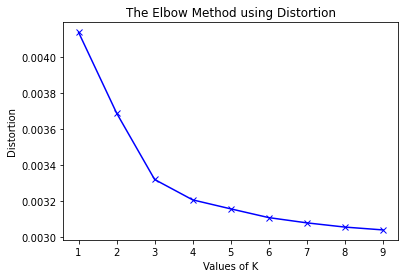

In [20]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [21]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 0.006031234283000231
2 : 0.004400961566716433
3 : 0.0036231805570423603
4 : 0.003363578813150525
5 : 0.0032559477258473635
6 : 0.0031593050807714462
7 : 0.0030987481586635113
8 : 0.0030426180455833673
9 : 0.003013661364093423


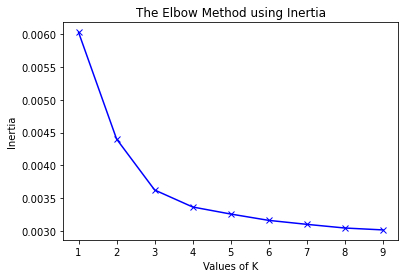

In [22]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [24]:
kcluster[2]

KMeans(n_clusters=3)

In [25]:
print(kcluster[4].labels_)
print(kcluster[4].cluster_centers_)

[0 0 0 0 2 2 0 4 2 0 0 0 0 1 1 0 2 4 4 2 0 0 2 2 2 2 2 4 3 2 4 1 2 0 3 4 2
 2 2 2 0 1 2 0 2 4 0 4 3 3 3 4 2 4 4 4 1 2 2 2 0 0 2 3 4 4 0 2 0 4 3 3 4 4
 0 4 2 4 0 1 2 0 0 0 3 2 0 4 2 3 4 1 2 0 2 2 4 3 4 2 4 4 3 4 4 3 2 0 2 4 0
 0 4 0 2 3 4 2 4 4 2 0 0 4 2 2 2 0 0 4 2 2 4 3 0 2 2 2 4 2 3 0 4 4 3 4 4 2
 4 0 4 0 2 4 4 2 2 2 2 0 0 3 2 3 0 1 2 1 0 3 0 2 3 0 0 2 2 1 2 2 2 2 2 4 2
 1 2 2 2 3 4 4 0 2 4 0 0 2 2 0 2 0 0 0 2 2 2 0 2 0 4 4 0 4 2 0 2 0 3 0 0 2
 2 1 2 2 0 2 2 2 0 0 0 0 4 2 0 2 0 0 3 0 2 0 0 2 4 4 4 0 3 0 3 2 2 0 4 0 4
 2 2 2 0 0 3 0 2 0 0 2 0 0 2 0 0 0 2 0 1 2 4 4 1 3 2 4 4 2 4 4 4 0 3 0 3 2
 2 4 2 4 0 4 2 2]
[[-2.59445398e-03  8.20660498e-04  1.23485239e-04 -4.90486927e-05
   1.28310508e-04  1.12443104e-05 -6.36231698e-06 -1.23481850e-05
  -7.11673347e-05  6.05234927e-05 -1.36433637e-05 -4.77641443e-05
  -4.76479290e-05 -2.70517876e-06  2.52453083e-05 -1.10876117e-05
  -1.50840026e-06  1.27286949e-05 -2.82223914e-06  2.92850655e-05
  -5.45257062e-05 -3.25025695e-09  6.27010968e-06  4

In [26]:
label = kcluster[5].labels_
cent =kcluster[5].cluster_centers_

In [27]:
clu,count = {},0
for i in range(len(t)):
    clu[count]= 1-(dot(cent[label[i]], p_dims[i])/(norm(cent[label[i]])*norm(p_dims[i])))
    count+=1

In [28]:
clu

{0: 0.2764178514480591,
 1: 0.627129852771759,
 2: 0.44671064615249634,
 3: 0.585383266210556,
 4: 0.8978815600275993,
 5: 0.5464500188827515,
 6: 0.39355987310409546,
 7: 0.8288446068763733,
 8: 0.4050125479698181,
 9: 0.30292582511901855,
 10: 0.13720083236694336,
 11: 0.2818719744682312,
 12: 0.4645161032676697,
 13: 0.00040841102600097656,
 14: 0.07585656642913818,
 15: 0.40838301181793213,
 16: 0.6103334724903107,
 17: 0.5993009507656097,
 18: 0.5534168481826782,
 19: 0.9513226710259914,
 20: 0.35188478231430054,
 21: 0.5982840061187744,
 22: 0.6777947843074799,
 23: 0.5684600472450256,
 24: 0.7066234052181244,
 25: 0.49023669958114624,
 26: 0.6510562896728516,
 27: 0.7378954589366913,
 28: 0.3392173647880554,
 29: 0.8667139708995819,
 30: 0.7828421890735626,
 31: 0.00040841102600097656,
 32: 0.7009930312633514,
 33: 0.5013630390167236,
 34: 0.4975830912590027,
 35: 0.5440197288990021,
 36: 0.9253777489066124,
 37: 0.659883439540863,
 38: 0.6784729957580566,
 39: 0.468712151050567

In [29]:
a=sorted(clu.items(), key = lambda kv:[kv[1], kv[0]])

In [30]:
top_sen =[]
for i in range(108):
    top_sen.append(a[i][0])

In [31]:
to =top_sen.sort()

In [32]:
to = sorted(top_sen)

In [33]:
summry = ""
for  i in to:
    print(li[i])
    summry += li[i]

 रघुवंशं महाकविकालिदासेन विरचितं किञ्चन महाकाव्यमस्ति।
 कालिदासः अग्निवर्णपरवर्तिनां राज्ञाम् अपि वर्णनं चिकीर्षति स्म, परम् असौ कालेन कवलीकृतः इति किंवदन्ती।
रघुवंशं सूर्यकुलोत्पन्नानां भूपतीनां चरितकथनात्मकं वर्तते।
 दिलीपपुत्रस्य रघोर्नाम्ना सकल एव सूर्यवंशो रघुवंश इति ख्यातिं गतः।
 सूर्यवंशस्य रघुनाम्ना प्रसिद्धेः कारणं महाकविकालिदासः वर्णयति यत्,ततः समानीय स मानितार्थी हस्तौ स्वहस्तार्जितवीरशब्दः।
।
 इति।
 अत्र परमानन्ददायकाः धर्मार्थकामोक्षरूपाश्चत्वारो वर्गाः विहिताः।
 दक्षिणप्रान्ते अपि कश्वन प्रवादः अस्ति यत्, सः दक्षिणात्यः आसीत् इति।
।
।
 असमर्थतायां सत्याम् अपि अहं तेषां वर्णनं कर्तुं प्रयत्नं कुर्वन् अस्मि इत्युक्त्वा सः रघुवंशीयानां राज्ञां गुणानां वर्णनम् आरभते।
 प्रारम्भे तु वैवस्वत-नामकस्य मनोः कुले चन्द्रसमानः दिलीपः समुत्पन्नः इत्येव उल्लिखितम् अस्ति।
 इक्ष्वाकोः पुत्रः पुरञ्जयः अभवत्।
 तस्य अपरं नाम कुकुस्थः इति।
 तस्य पुरञ्जयस्य पुत्रः दिलीपः अभवत् इति।
 अर्थात् सम्पूर्णः जम्बूद्वीपः।
।
 ततः तौ दम्पती सपत्नीं गुरुवसिष्ठं प्रणामं कुरुतः।
दिलीपः कथयति यत्, हे ऋषे! भव

In [34]:
li

[' रघुवंशं महाकविकालिदासेन विरचितं किञ्चन महाकाव्यमस्ति।',
 ' तत् एकोनविंशति-सर्गात्मकं लालित्यपूर्णं महाकाव्यम्।',
 ' रघुवंशस्य कथावस्तु सूर्यवंशस्य राज्ञां वर्णनाधारितम् अस्ति।',
 ' दशमसर्गादारभ्य पञ्चदशसर्गपर्यन्तं रामस्य कथा वर्णिता अस्ति।',
 ' तदुतरं रामवंश्यानां ततन्नृपाणां चरितानि उपन्यस्तानि।',
 ' अन्तिमः सर्गः अग्निवर्णस्य गर्भवत्याः महाराज्याः शासनाचरणेन समं समाप्यते।',
 ' कालिदासः अग्निवर्णपरवर्तिनां राज्ञाम् अपि वर्णनं चिकीर्षति स्म, परम् असौ कालेन कवलीकृतः इति किंवदन्ती।',
 ' तथा च कालिदासेन परतः अपि रघुवंशस्य सर्गाः लिखिताः; परन्तु ते न प्राप्यन्ते इत्यपि प्रसिद्धिः।',
 ' रघुवंशे येषां राज्ञां वर्णनानि सन्ति, तेषां रामायणवर्णितनपैः सह भेदः आपतति, परन्तु वायुपुराण-वर्णितानुसारं रामवंशावल्या सह रघुवंशवर्णित-वंशावली भूयसा सामञ्जस्यं धारयति।',
 'रघुवंशं सूर्यकुलोत्पन्नानां भूपतीनां चरितकथनात्मकं वर्तते।',
 ' दिलीपपुत्रस्य रघोर्नाम्ना सकल एव सूर्यवंशो रघुवंश इति ख्यातिं गतः।',
 ' सूर्यवंशस्य रघुनाम्ना प्रसिद्धेः कारणं महाकविकालिदासः वर्णयति यत्,ततः समानीय स मानितार्थी हस्तौ स्

In [35]:
summry

' रघुवंशं महाकविकालिदासेन विरचितं किञ्चन महाकाव्यमस्ति। कालिदासः अग्निवर्णपरवर्तिनां राज्ञाम् अपि वर्णनं चिकीर्षति स्म, परम् असौ कालेन कवलीकृतः इति किंवदन्ती।रघुवंशं सूर्यकुलोत्पन्नानां भूपतीनां चरितकथनात्मकं वर्तते। दिलीपपुत्रस्य रघोर्नाम्ना सकल एव सूर्यवंशो रघुवंश इति ख्यातिं गतः। सूर्यवंशस्य रघुनाम्ना प्रसिद्धेः कारणं महाकविकालिदासः वर्णयति यत्,ततः समानीय स मानितार्थी हस्तौ स्वहस्तार्जितवीरशब्दः।। इति। अत्र परमानन्ददायकाः धर्मार्थकामोक्षरूपाश्चत्वारो वर्गाः विहिताः। दक्षिणप्रान्ते अपि कश्वन प्रवादः अस्ति यत्, सः दक्षिणात्यः आसीत् इति।।। असमर्थतायां सत्याम् अपि अहं तेषां वर्णनं कर्तुं प्रयत्नं कुर्वन् अस्मि इत्युक्त्वा सः रघुवंशीयानां राज्ञां गुणानां वर्णनम् आरभते। प्रारम्भे तु वैवस्वत-नामकस्य मनोः कुले चन्द्रसमानः दिलीपः समुत्पन्नः इत्येव उल्लिखितम् अस्ति। इक्ष्वाकोः पुत्रः पुरञ्जयः अभवत्। तस्य अपरं नाम कुकुस्थः इति। तस्य पुरञ्जयस्य पुत्रः दिलीपः अभवत् इति। अर्थात् सम्पूर्णः जम्बूद्वीपः।। ततः तौ दम्पती सपत्नीं गुरुवसिष्ठं प्रणामं कुरुतः।दिलीपः कथयति यत्, हे ऋषे! भवतः आशीर्वादेन राज्

In [36]:
ref= """ एकदा पौराः राजानम् उपसृत्य न्यवेदयन् । महाराज! नगरेऽस्मिन् वरीवर्धतेतरां दिनादपि दिनं मूषिकपीडाऽस्माकम् । पञ्जरगृहीतास्तेऽयःशलाका दष्ट्वा भक्त्वा च बहिर्गच्छन्ति । ततो राजा सचिवोपदेशेन सहस्रं स्थूलौतून क्रीत्वैकैकस्मै पौरायैकैकं बिडालं पोषणाय चैका गां च पयस्विनीमदात् । दुग्धपानलालसो बिडालः पातुं मुखं निर्मज्ज्य प्लुष्टमुख उच्चैः “ म्याव् म्याव्” इति क्रन्दन्नुन्नमितपुच्छो हस्ताद्विधूय पलायांचक्रे ।  यथायथा रामलिङ्गः पयःपानेन पीवरस्तथा तथा स बिडालो निराहारः क्रिशिष्ठो । मृतकल्पश्च जातः ।सर्वेषां मार्जालाः अपहाय रामलिङ्गस्य पीना व्याघ्रशावकाः इव सन्ति । महाराज! नासौ पिबति पयांसि। प्रतिश्रूयते मया यदि त्वदुक्तं तथ्यं भवेत् दद्यां शतं निष्कान् । राजा स्वयमेव बिडालं हस्तकृत्वा तं पाययितुं व्यवस्थापयत् । दृष्टमात्रा एव क्षीरपात्रे मार्जारो राज्ञो हस्तादुत्प्लुत्य दीनदीनं “म्याव् म्याव्” इति क्रन्दन् दूरं पलायितः । सत्यं जितं त्वया । तथाप्यत्रास्ति किञ्चित्परीक्ष्यम् । कुतोऽसौ तपस्वी न पिबति पयांसि इति ।  इत्युक्त्वा कथमपि बिडालं हस्तकृत्वा पर्येक्षिष्ट तस्य मुखं सूक्ष्मेक्षिकया । ततः कुपितः प्राह धिक्त्वां जाल्म ! अपीप्यस्त्वं बिडालमत्युष्णं पयः । येन मुखमस्य प्लुष्टमासीत् । दृश्यन्ते स्फुटतया मुखे दाहरेखाः । अत एवायं दृष्टमानं पयःपात्रे बिभ्यत्पलायते । यथा शिशूनां क्षीरमवश्यपेयं न तथा बिडालस्य । राजा विहस्य प्रतिज्ञामनुरुध्य शतं निष्कानयच्छत् । अवदच्च मापीपिडः पुनर्मूकान्दयनीयान् जन्तूनितःपरम् । """

In [37]:
ref="""रघुवंशं महाकविकालिदासेन विरचितं किञ्चन महाकाव्यमस्ति । रघुवंशस्य कथावस्तु सूर्यवंशस्य राज्ञां वर्णनाधारितम् अस्ति। दशमसर्गादारभ्य पञ्चदशसर्गपर्यन्तं रामस्य कथा वर्णिता अस्ति ।  अन्तिमः सर्गः अग्निवर्णस्य गर्भवत्याः महाराज्याः शासनाचरणेन समं समाप्यते । रघुवंशे येषां राज्ञां वर्णनानि सन्ति, तेषां रामायणवर्णितनपैः सह भेदः आपतति, परन्तु वायुपुराण-वर्णितानुसारं रामवंशावल्या सह रघुवंशवर्णित-वंशावली भूयसा सामञ्जस्यं धारयति।
रघुवंशं सूर्यकुलोत्पन्नानां भूपतीनां चरितकथनात्मकं वर्तते।

महाकाव्यस्य लक्षणानुसारं यानि लक्षणानि आवश्यकतानि, तानि रघुवंशे दरीदृश्यन्ते । अस्मिन् अङ्गी वीरो रसः।  अत्र परमानन्ददायकाः धर्मार्थकामोक्षरूपाश्चत्वारो वर्गाः विहिताः। प्रारम्भेऽस्मिन् पार्वती-परमेश्वरयोः नमस्कारात्मक मङ्गलाचरम् अस्ति। सर्गाणाम् आदिमध्येषु एकविधम् अन्तेषु अन्यविधं वृत्तम् अस्ति। 

भारतीयैः, पाश्चात्यैः च विद्वद्भिः कृताः रघुवंशस्य अनेकाः टीकाः समुपलभ्यन्ते। तासुमल्लिनाथसूरेः टीका प्रसिद्धा। तस्याः नाम सञ्जीवनी-टीका इति। 

महाकविः कालिदासः शिवाशिवौ नत्वा रघुवंशस्य आरम्भं करोति। तत्र उपमालङ्कारस्य माध्यमेन सः कथयति यत्, अहं विशिष्टशब्दार्थयोः सम्यग्ज्ञानार्थं शब्दार्थाविव नित्यसम्मिश्रौ संसारस्य मातापितरौ शिवाशिवौ भक्त्या नमस्करोमि इति।

रघुवंशे दिलीपस्य पिता कः इति प्रारम्भे न उल्लिखितम्।  तस्य शरीरं बलिष्ठं वर्णितम् अस्ति। तस्य राज्ये चौरकर्मस्य सम्पूर्णतया अभावः अपि उक्तः तेन। तस्य राज्यं परितः समुद्रः एव आसीत्। अनेन सह कालिदासेन आश्रमस्य वातावरणस्य अपि प्राकृतिकसौन्दर्य प्रकटनाय वर्णनं कृतम् अस्ति। 
दिलीपः कथयति यत्, हे ऋषे! भवतः आशीर्वादेन राज्य-प्रजा-सम्पतयः सुरक्षिताः, वर्धमानाः च सन्ति। परन्तु मम कुलाय तर्पणदाता पुत्रः एतावता न प्राप्तः। "हे नृप! त्वम् एकदा इन्द्रलोकं गत्वा भगवन्तं वज्रपाणिं (इन्द्र) समुपास्य यदा नरलोकं पृथ्वी प्रति प्रत्यागमनाय प्रवृत्तः आसिः, तदा ते मार्गे सुरभिः नाम कामधेनुः पारिजातकच्छायायां स्थिता आसीत्। सा कामधेनुः तु अधुना पाताले जायमाने यज्ञे उपस्थिता, परन्तु तस्याः पुत्री अत्र विद्यते। 

तदैव नन्दिनीनाम्नी कामधेनुकन्या वनात् प्रत्यागता। ततः महाकविः कालिदासः नन्दिन्याः वर्णनं श्लोकत्रयेष करोति।  ततः ऋषिः सुदक्षिणायाः कर्तव्यं वदन् कथयति यत्, तव स्त्री शुद्धान्तःकरणेन भक्तिभावेन अनुदिनं प्रातःकाले गन्धमाल्यादिभिः इमाम् अर्चयित्वा आश्रमपर्यन्तम्। ततश्च गरोः आज्ञां प्राप्य गुरुणा व्यवस्थापिते कुटिरे तौ दम्पती शयनं कृत्वा प्रातः आश्रमस्थानाम् ऋषिकुमाराणां वेदमन्त्राणां गानेन सह जागृतौ।

द्वितीये दिने प्रभाते नन्दिन्याः वत्सं दुग्धं पाययित्वा नृपमहिषी सुदक्षिणा मालाचन्दनादिभिः नन्दिन्याः अर्चनां करोति। दिलीपः नन्दिन्याः अनुसरणं करोति। चलनं, विश्राम, जलपानं च नन्दिन्याः अनन्तरमे सः करोति स्म। एवं कालिदासेन तस्य अनुसरणशीलतायै छायावत अनुसरणस्य उपमा पदत्ता वर्तते।

वनस्थानां व्याघ्रादीनां हिंसकपशूनां प्रहारात् नन्दिन्याः रक्षणं कर्तुं राजा दिलीपः धनुष्काण्डैः सुसज्जः तस्याः अनुसरणं करोति स्म।  रात्रौ नन्दिन्याः पृष्ठतः तौ दम्पती क्रमेण तस्याः शयनोत्तरं निद्रां कृतवन्तौ, पातःकाले च जागरणोत्तरं जागृतः। 
द्वाविंशे दिने नन्दिनी स्वसेवकस्य दिलीपस्य मनोगतं ज्ञातुम् इष्टवती लीलाम् अरचयत्। तस्मिन् दिने सा घोरवनं प्रविष्टवती। यतो हि दिलीपः प्रकृतिदर्शने निमग्नः आसीत्, अतः सिंहस्य आक्रमणं तु सः न दृष्टवान्, परन्तु ततः स दृष्टवान् यत्, सः सिंहः नन्दिन्याः उपरि आक्रमणं कृतवान् इति।
परन्तु बाणस्य मूलप्रदेशे (पुच्छस्य प्रदेशः) गृहीते सति सः दिलीपः चित्रलिखितः  स्यात्, तथा स्थिरो अभवत्। महादेवः यदा श्वेतवर्णीये वृषभे आरोढुम् इच्छति, तदा निकुम्भनामकस्य सेवकस्य पृष्ठोपरि चरणं निधाय आरोहति। एवं संवर्धितस्य अस्य देवदारोः त्वक् एकदा हस्तिनः कपोलघर्षणेन उन्मथिता। 
बाणसञ्चालने निष्फलः राजा दिलीपः उक्तवान् यत्, हे सिंह! जडचेतनानाम् उत्पत्तिप्रलयसंहारहेतुः स शिवः मे माननीयः। परन्तु हे प्रजानाथ! यदि त्वं मह्यं निजशरीरम् अदत्त्वा प्रतिगच्छसि, तर्हि चिरकालं यावत् विघ्नेभ्यः प्रजारक्षणं कर्तुं प्रभविष्यसि।
अन्यघटोनीनां दानात् महर्षेः क्रोधापनयः कथं न शक्यः? ततः सिंहस्य स्वस्योपरि तीव्राघातः स्यात् इति विचिन्यमाणः दिलीपः नतमस्तकः सन् अतिष्ठत्।
तस्मिन्नेव समये विद्याधरैः दिलीपस्योपरि पुष्पवर्षाः कृताः। 
यतो हि तत् सर्वं नन्दिन्याः माया आसीत्। तदा दिलीपः हस्ताञ्जलिं बध्वा कुलविस्तारस्य कृते सुदक्षिणायां कीर्तिमन्तं पुत्रम् अयाचत।  ततः गुरोः आदेशं प्राप्य वत्सपानस्य, हवनस्य च अवशिष्टं धेनोः दुग्धं दिलीपः अपीबत्।

सगर्भायाः सुदक्षिणायाः सर्वाः इच्छाः दिलीपः पूरयति स्म। समये सजाते अर्धरात्रौ सुदक्षिणया पुत्रः जनितः। यदा विश्वस्तः परिचारकः आगत्य कुमारजन्मनः वार्ती राजे न्यवेदयत्, तदा राजा अमृतमिव वचनम् आकर्ण्य आत्मनः सर्वाण्येव आभूषणानि तस्मै प्रादात्, केवम् अत्युज्ज्वलं राजच्छत्रं चामरद्वयं च अदेयत्वात् तस्मै न प्रदत्तम्। स राजा स्वपत्रस्य रघः इति नामकरणम अकरोत।

यथा शुक्लपक्षस्य प्रतिपच्चन्द्रः तेजोनिधेः सूर्यस्य किरणसम्पर्केण कलाभिः दिने दिने वर्द्धते, तथैव स कुमारोऽपि पितुः प्रयत्नेन मनोहरैः अङ्गः दिने दिने वृद्धिङ्गतः। निपुणाः आचार्याः गुरुसेवकं तं रघु विद्याः शिक्षितवन्तः। ततः राजकन्याभिः सह रघोः विवाहः अभवत्। 
शततमे अश्वमेधावसरे दिलीपः यदा यज्ञाश्वम् अमोचयत्, तदा इन्द्रः अदृश्यरूपो भूत्वा धेनु तां रक्षिणाम् अग्रतः एव तम् अश्वम् अपहृत्य गतः।  रघोः गम्भीरस्वरं श्रुत्वा भीतः इन्द्रोऽपि स्थिरः अभवत्।
मम पितुः अश्वमेधयज्ञस्य प्रधानसाधनम् अश्वं मे देहि, भवादृशाः धर्ममार्गप्रचारकाः स्वयमेव कुत्सितमार्गे न खलु प्रवर्तन्ते? इति।



पुरा यथा कपिलमुनेः कोपेन सगरस्य अश्वमेधः भग्नः अभवत्, तथैव अधुना मम क्रोधेन तव पितः यज्ञः भग्नो भविष्यति। अतः अलं तव वृथापरिश्रमेण इति। अतः इन्द्रः वजम् उत्थाप्य रघोः वक्षस्थले प्राहारयत्। इन्द्रस्य वज्रस्य कठोराघातेषु सत्सु अपि रघोः अत्यन्तं प्रराक्रमं दृष्ट्वा इन्द्रः सन्तुष्टः। 

दिलीपस्य शासनकाले एव शत्रूणां हृदयेषु दुःखाग्निः ज्वलनोन्मुख इव आसित्। वङ्गदेशीयाः भूपाः रणतरीः सज्जीकृत्य युद्धे प्रवृताः अभूवन, रघुरपि सर्वांस्तान् निर्जित्य गङ्गाप्रवाहमध्यगतेषु देशेषु विजयस्तम्भान् आरोपयत्।
ततः स्वस्य दिग्विजयाभियानम् अग्रे सरयन् रघुः निजहस्तिपरम्पराभिः कपिशां नदी ती| उत्कलैः राजभिः सन्दर्तिमार्गः सन् कलिङ्गदेशं जेतुम् अगच्छत्।  दक्षिणदिशि प्रयातस्य रघोः प्रतापः पाण्डुदेशीयाः नृपाः सोढम् असमर्थाः आसन्। अतः ते तस्य चरणमले प्रणताः। 

केरलप्रदेशस्य मुरलानद्याः तटमार्गेण पारसीकान् यवनान् जेतुं गतः।  ते पराजिताः कम्बोजदेशीयाः राजानः उत्तमाश्वादिभिः उपहारैः कोसलस्वामिनः रघोः समीपे उपस्थिताः।

विश्वजितयज्ञोऽत्तरं सर्वं धनं दानत्वेन दत्तवतः रघोः पार्थे कौत्सर्षिः  कोटिः सुवर्णमुद्राः दानत्वेन स्वीकर्तुम् उपस्थितः। रविः यथा अन्धकारान्धं लोकं प्रकाशेन उद्बोधयति, तथा अज्ञानतिमिरान्धं त्वां यः ज्ञानप्रकाशेन उद्बोधितवान् स वेदनिधिः ते गुरुः कुशली अस्ति? 


सत्यशीलस्य रघोः तथा वचनेन सः कौत्सः परां प्रीतीम् अगच्छत्। रघुरपि सकलधनसङ्ग्रहात् वसुधां धनशून्याम् अवलोक्य कबेरात् तद्देयं धनं बलाद् आहर्तुम् अचिन्तयत्।"""

In [38]:
from rouge import Rouge

In [39]:
rouge = Rouge()

print(rouge.get_scores(summry, ref))


[{'rouge-1': {'r': 0.5118243243243243, 'p': 0.3754646840148699, 'f': 0.43316654265204246}, 'rouge-2': {'r': 0.3587385019710907, 'p': 0.2597526165556613, 'f': 0.301324498439329}, 'rouge-l': {'r': 0.44932432432432434, 'p': 0.32961586121437425, 'f': 0.38027161770565215}}]


In [47]:
li =[{'rouge-1': {'r': 0.5118243243243243, 'p': 0.3754646840148699, 'f': 0.43316654265204246}, 'rouge-2': {'r': 0.3587385019710907, 'p': 0.2597526165556613, 'f': 0.301324498439329}, 'rouge-l': {'r': 0.44932432432432434, 'p': 0.32961586121437425, 'f': 0.38027161770565215}}]
li

[{'rouge-1': {'r': 0.5118243243243243,
   'p': 0.3754646840148699,
   'f': 0.43316654265204246},
  'rouge-2': {'r': 0.3587385019710907,
   'p': 0.2597526165556613,
   'f': 0.301324498439329},
  'rouge-l': {'r': 0.44932432432432434,
   'p': 0.32961586121437425,
   'f': 0.38027161770565215}}]

In [40]:
rouge.get_scores(summry, ref)[0].keys()

dict_keys(['rouge-1', 'rouge-2', 'rouge-l'])

In [41]:
list_p = []
list_r = []
list_f = []

iterate = rouge.get_scores(summry, ref)[0]

for key in iterate.keys():
    list_p.append(iterate[key]['p'])
    list_r.append(iterate[key]['r'])
    list_f.append(iterate[key]['f'])
    
list_r, list_p, list_f

([0.5118243243243243, 0.3587385019710907, 0.44932432432432434],
 [0.3754646840148699, 0.2597526165556613, 0.32961586121437425],
 [0.43316654265204246, 0.301324498439329, 0.38027161770565215])

In [42]:
import matplotlib.pyplot as plt


In [43]:
cat =['r','p','f']
score_1= list(d['rouge-1'].values())
score_2= list(d['rouge-2'].values())
score_3= list(d['rouge-l'].values())

NameError: name 'd' is not defined

(array([0, 1, 2]),
 [Text(0, 0, 'rouge-1'), Text(1, 0, 'rouge-2'), Text(2, 0, 'rouge-l')])

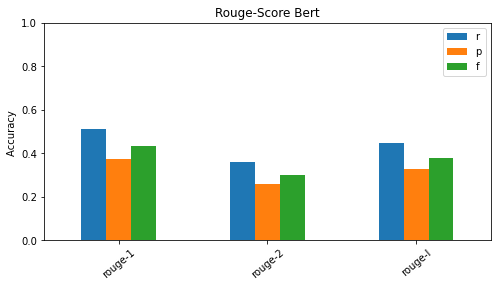

In [48]:
import pandas as pd
xmax=1.0

plotdata = pd.DataFrame({

    "r":list_r,

    "p":list_p,

    "f":list_f},

    index= ['rouge-1','rouge-2','rouge-l'])

plotdata.plot(kind="bar",figsize=(8, 4))
ax = plt.gca()
ax.set_ylim([0, 1])


plt.title("Rouge-Score Bert")
plt.ylabel("Accuracy ")
plt.xticks(rotation=40)

#plt.xlabel("Rouge-Score")

#plt.ylabel("Rouge-Score")